In [2]:
#1
import pickle
import os,sys
import numpy as np
from baseline.AKE.ake import AKE
from baseline.Kriging.kriging import OrdryKriging
from baseline.NMF.nmf import NMF
from baseline.ST_MVL.st_mvl import ST_MVL
import matplotlib.pyplot as plt
import pickle

In [3]:
from matplotlib import rc
import matplotlib.font_manager as mf

my_font= mf.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc') # 加载字体
rc('text',usetex=False) # 去取消利用Latex渲染标签

In [4]:
#2
with open('../tensor2.pkl','rb') as f:
    tensor_array = pickle.load(f)

In [5]:
#3
with open('../new_indices.pkl','rb') as f:
    new_indices = pickle.load(f)

In [6]:
#4
tensor_array = np.array(tensor_array)
tensor_array = tensor_array[new_indices]

In [6]:
# write
with open('ake_loss_30.pkl','wb') as f:
    pickle.dump(ake_loss,f)

with open('kriging_loss_30.pkl','wb') as f:
    pickle.dump(kriging_loss,f)
    
with open('nmf_loss_30.pkl','wb') as f:
    pickle.dump(nmf_loss,f)

with open('st_mvl_loss_30.pkl','wb') as f:
    pickle.dump(st_mvl_loss,f)

NameError: name 'ake_loss' is not defined

In [7]:
# read 
with open('ake_loss_30.pkl','rb') as f:
    ake_loss_30 = pickle.load(f)

with open('kriging_loss_30.pkl','rb') as f:
    kriging_loss_30 = pickle.load(f)
    
with open('nmf_loss_30.pkl','rb') as f:
    nmf_loss_30 = pickle.load(f)
    
with open('st_mvl_loss_30.pkl','rb') as f:
    st_mvl_loss_30 = pickle.load(f)


EOFError: Ran out of input

In [15]:
# dump
with open('2_ake_loss_total.pkl','wb') as f:
    pickle.dump(ake_loss_total,f)
    
with open('2_kriging_loss_total.pkl','wb') as f:
    pickle.dump(kriging_loss_total,f)
    
with open('2_nmf_loss_total.pkl','wb') as f:
    pickle.dump(nmf_loss_total,f)
    
with open('2_st_mvl_loss_total.pkl','wb') as f:
    pickle.dump(st_mvl_loss_total,f)


In [7]:
#5 load 

with open('../2_ake_loss_total.pkl','rb') as f:
    ake_loss_total = np.array(pickle.load(f)) / 133

with open('../2_kriging_loss_total.pkl','rb') as f:
    kriging_loss_total = np.array(pickle.load(f)) / 133
    
with open('../2_nmf_loss_total.pkl','rb') as f:
    nmf_loss_total = np.array(pickle.load(f)) / 133

with open('../2_st_mvl_loss_total.pkl','rb') as f:
    st_mvl_loss_total = np.array(pickle.load(f)) /133

# read dcs reconstruction loss
with open('../2_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total = np.array(pickle.load(f))/133

with open('3_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total1 = np.array(pickle.load(f))/133

with open('4_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total2 = np.array(pickle.load(f))/133


with open('5_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total3 = np.array(pickle.load(f))/133

with open('6_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total4 = np.array(pickle.load(f))/133

In [7]:
#6
def generate_missing_matrix(data_matrix,miss_ratio=0.1):
    origin  = data_matrix.copy()
    spatial_size = data_matrix.shape[0]
    temporal_size = data_matrix.shape[1]
    k = round(spatial_size*temporal_size*miss_ratio)
    mask = np.ones_like(data_matrix)
    ri = np.random.choice(spatial_size*temporal_size,k,replace=False)
    origin.flat[ri] = 0
    mask.flat[ri] = 0
    return origin,mask
data_matrix,mask =generate_missing_matrix(tensor_array[0],0.3)

In [11]:
#7
def get_distance_matrix(data_matrix,linear=False):
    if not linear:
        spatial_length = data_matrix.shape[0]
        # print(spatial_length)
        dis_matrix = np.random.rand(spatial_length,spatial_length)
        dis_matrix += dis_matrix.T
        np.fill_diagonal(dis_matrix,0)
        return dis_matrix
    else:
        spatial_length = data_matrix.shape[0]
        dis_matrix = np.zeros((spatial_length,spatial_length))
        for i in range(spatial_length):
            dis_matrix[i][i:] = np.arange(0,spatial_length-i)
        dis_matrix = dis_matrix + dis_matrix.T
        return dis_matrix

In [ ]:
ake_loss_total = []
kriging_loss_total = []
nmf_loss_total = []
st_mvl_loss_total = []



for miss_ratio in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    ake_loss = []
    kriging_loss = []
    nmf_loss = []
    st_mvl_loss = []  
    
    i = 0
    for tensor in tensor_array[:500]:
        data_matrix,mask = generate_missing_matrix(tensor,miss_ratio)
    
        ake = AKE()
        rec = ake.predict(data_matrix)
        ake_loss.append(np.sum(np.abs(rec-tensor)))
    
        odKrigin = OrdryKriging()
        odKrigin.train(data_matrix)
        rec1 = odKrigin.predict()
        kriging_loss.append(np.sum(np.abs(rec1-tensor)))
    
        nmf = NMF()
        rec2 = nmf.predict(data_matrix,mask)
        nmf_loss.append(np.sum(np.abs(rec2-tensor)))
    
        stmvl = ST_MVL()
        ds = get_distance_matrix(data_matrix,True)
        rec3 = stmvl.predict(data_matrix,ds)
        st_mvl_loss.append(np.sum(np.abs(rec3-tensor)))
    
        print('miss_ratio:{}, i:{}'.format(miss_ratio,i))
        i += 1
    
    ake_loss_total.append(ake_loss)
    kriging_loss_total.append(kriging_loss)
    nmf_loss_total.append(nmf_loss)
    st_mvl_loss_total.append(st_mvl_loss)

# Missing ratio and errors

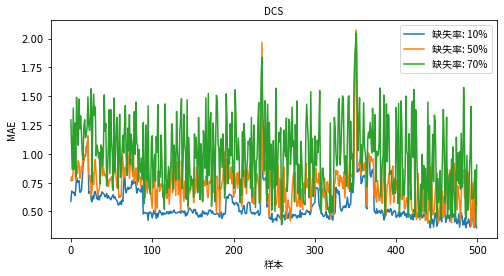

In [43]:
# plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(dcs_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))
# plt.plot()
plt.plot(dcs_loss_total2[0],label='缺失率: {}%'.format(10))
# plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
plt.plot(dcs_loss_total2[4],label='缺失率: {}%'.format(50))
plt.plot(dcs_loss_total2[6],label='缺失率: {}%'.format(70))
# plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))

plt.xlabel('样本',fontproperties = my_font)
plt.ylabel("MAE",fontproperties = my_font)

plt.title('DCS',fontproperties = my_font)
plt.legend(prop=my_font)
plt.savefig('21_dcs_loss_total_500_11.png',dpi=300,bbox_inches='tight')

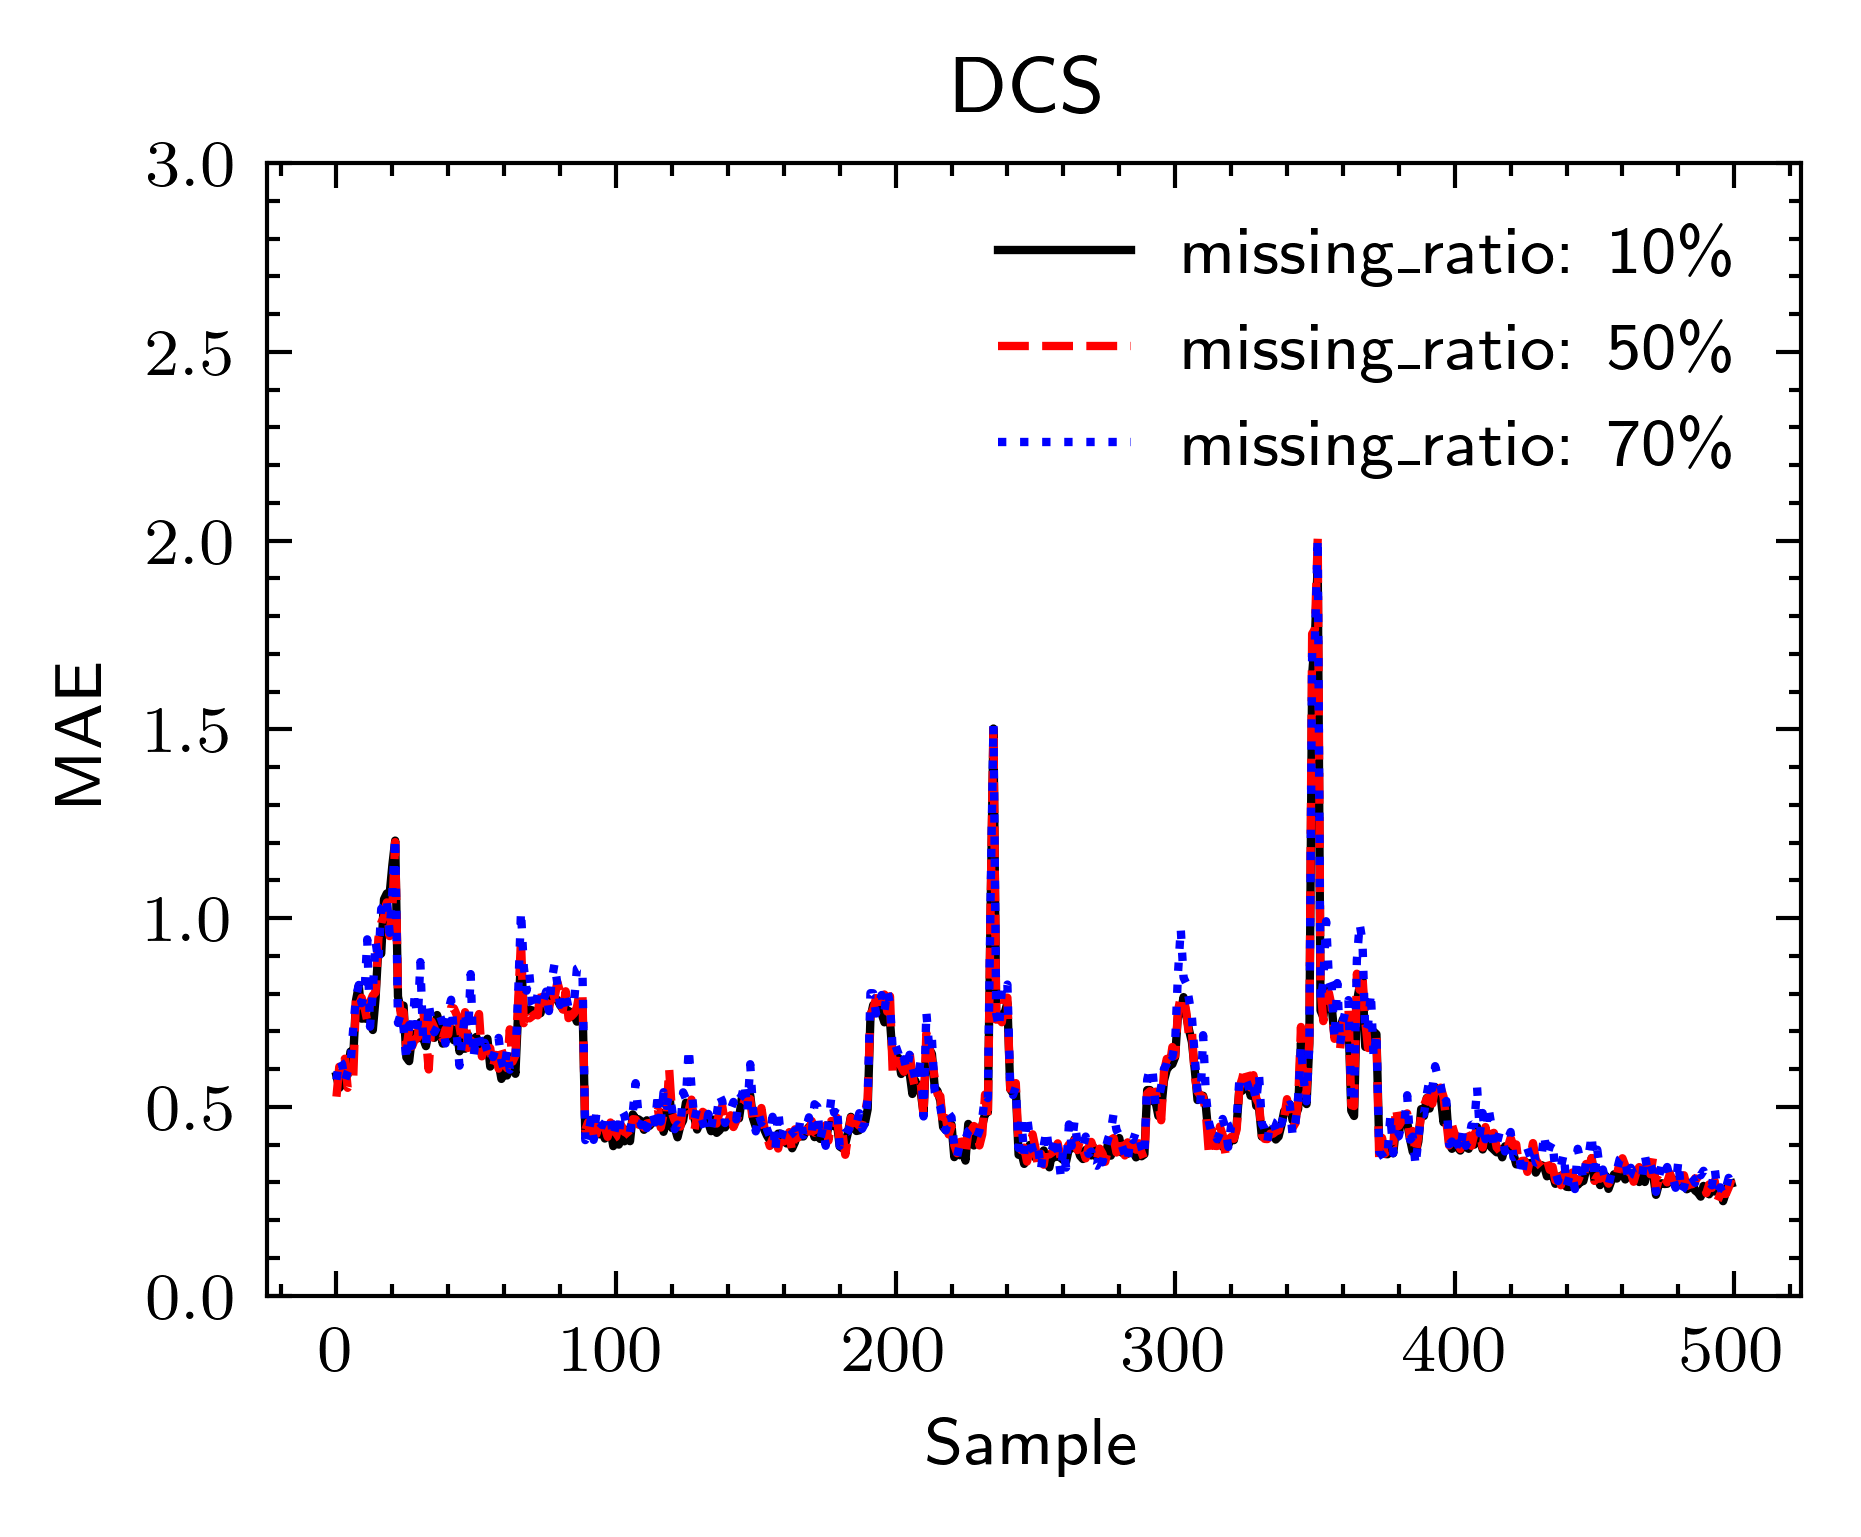

In [47]:
# plt.rcParams['figure.figsize']=(16,8)
# plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(dcs_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))
# plt.plot()
with plt.style.context(['science','ieee']):

    plt.plot(dcs_loss_total[0],label='missing_ratio: {}\%'.format(10))
    # plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
    plt.plot(dcs_loss_total[4],label='missing_ratio: {}\%'.format(50))
    plt.plot(dcs_loss_total[6],label='missing_ratio: {}\%'.format(70))
    # plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))
    plt.xlabel('Sample')
    plt.ylabel("MAE")
    plt.ylim(0,3)

    plt.title('DCS')
    plt.legend()
    plt.savefig('14_dcs_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

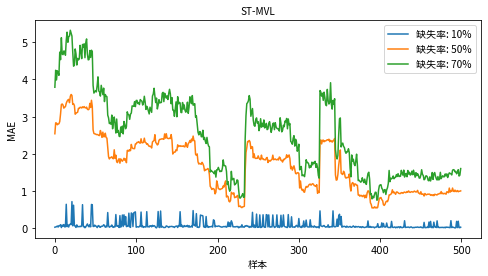

In [40]:

# plt.rcParams['figure.figsize']=(16,8)
# plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(st_mvl_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))
plt.rcParams['figure.figsize']=(8,4)


# with plt.style.context(['science', 'ieee']):
plt.plot(st_mvl_loss_total[0],label='缺失率: {}%'.format(10))
plt.plot(st_mvl_loss_total[4],label='缺失率: {}%'.format(50))
plt.plot(st_mvl_loss_total[6],label='缺失率: {}%'.format(70))

plt.xlabel('样本',fontproperties = my_font)
plt.ylabel("MAE",fontproperties = my_font)

plt.title('ST-MVL',fontproperties = my_font)
plt.legend(prop=my_font)
plt.savefig('21_st_mvl_loss_total_500_11.png',dpi=300,bbox_inches='tight')

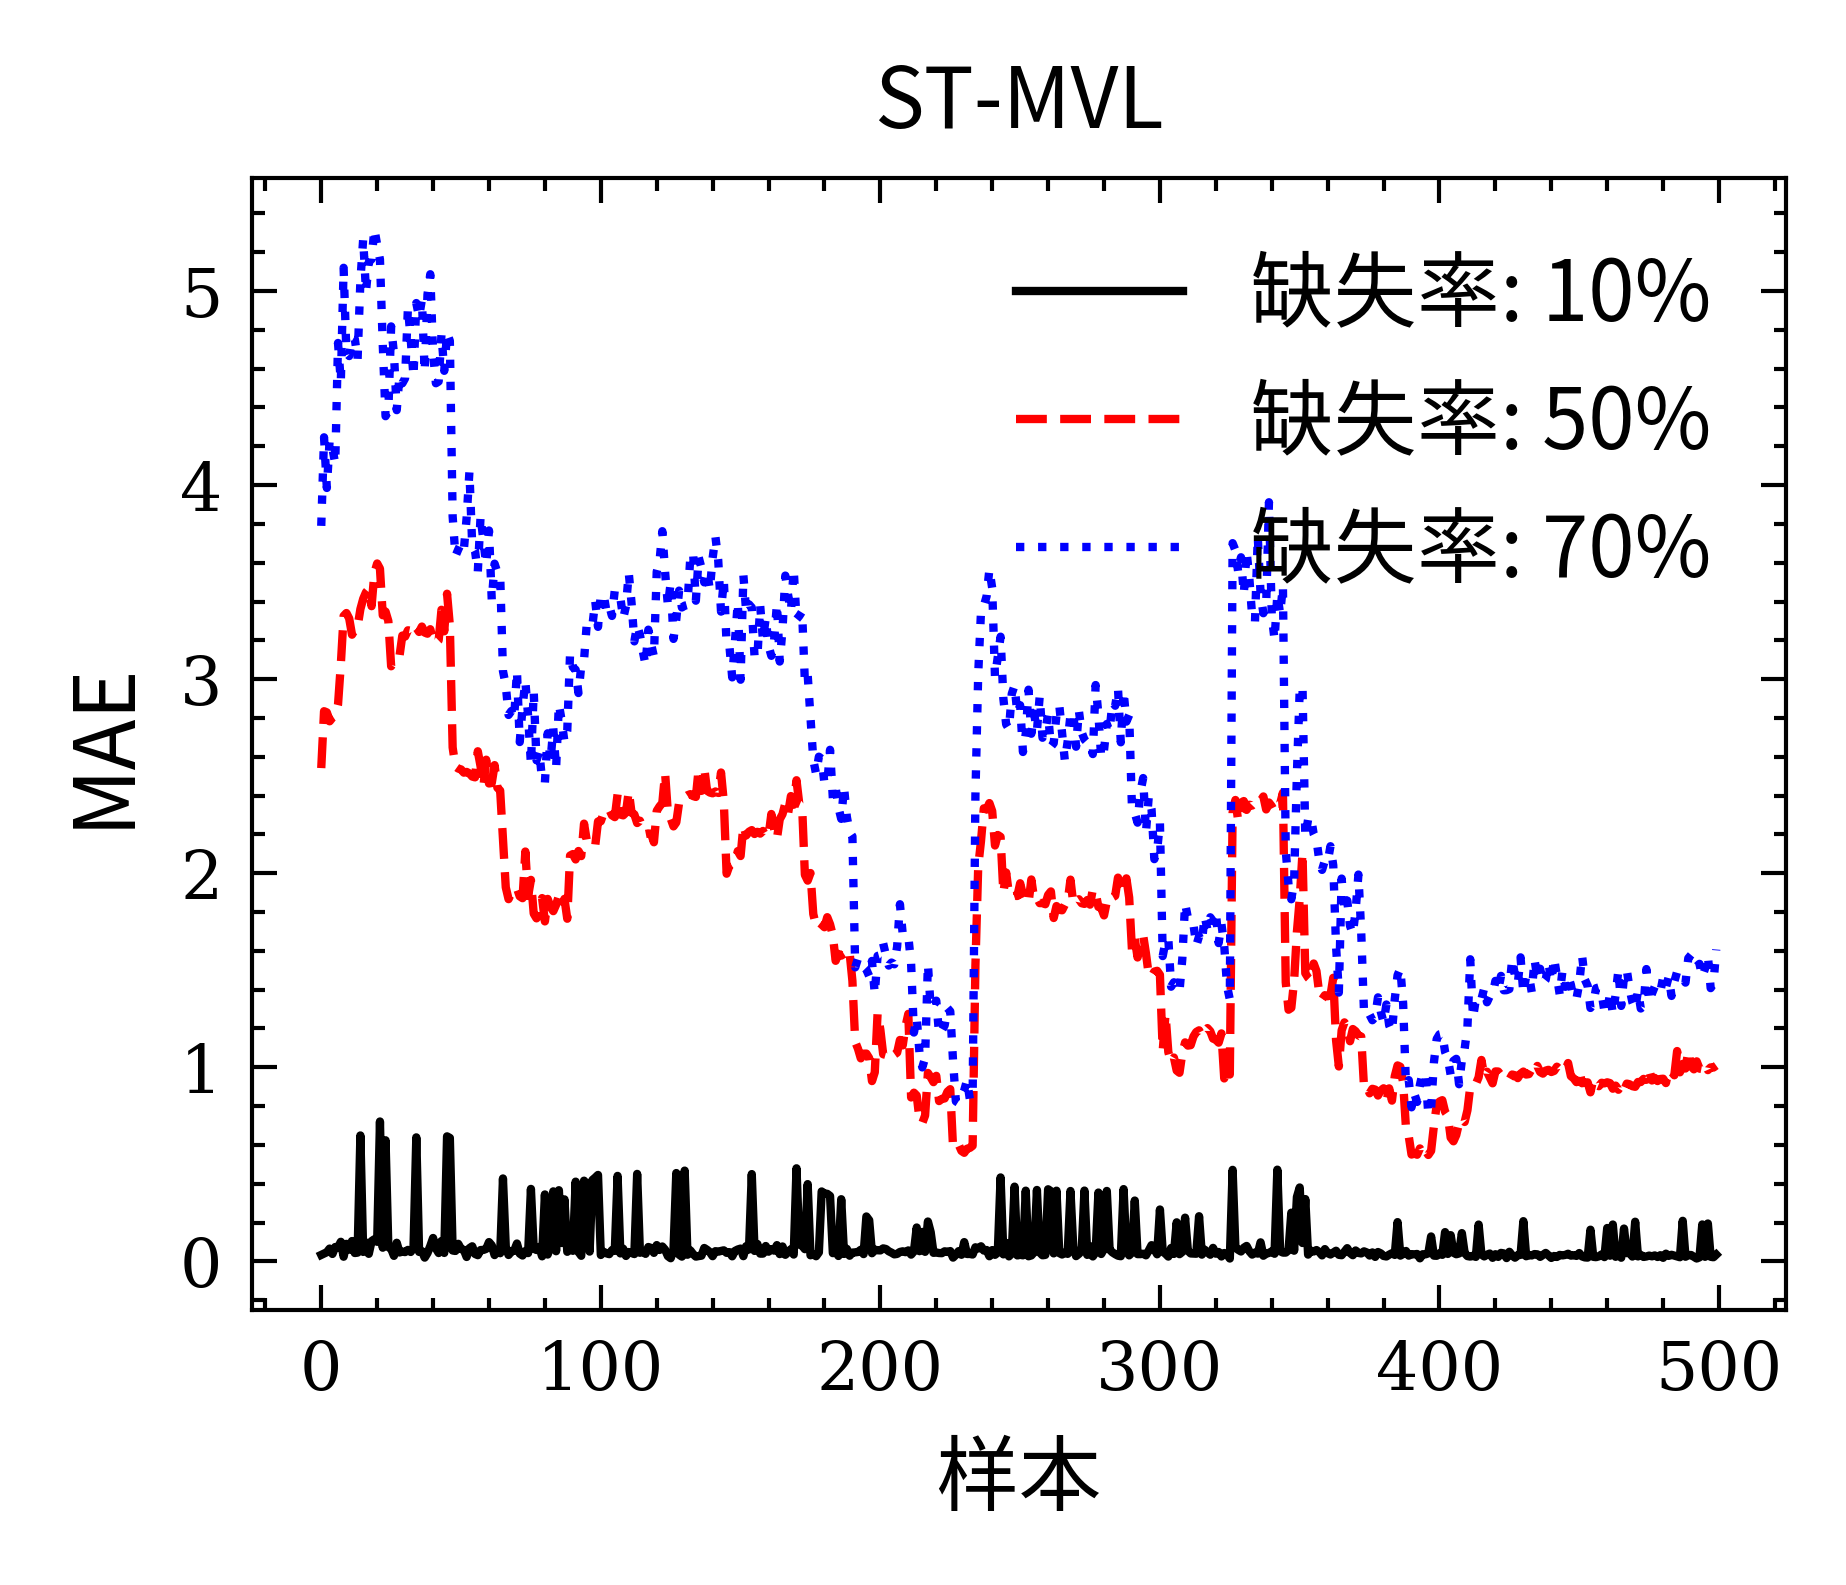

In [26]:
with plt.style.context(['science','ieee','no-latex','cjk-sc-font']):

    plt.plot(st_mvl_loss_total[0],label='缺失率: {}%'.format(10))
    # plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
    plt.plot(st_mvl_loss_total[4],label='缺失率: {}%'.format(50))
    plt.plot(st_mvl_loss_total[6],label='缺失率: {}%'.format(70))
    # plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))
    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel("MAE",fontproperties = my_font)

    plt.title('ST-MVL',fontproperties = my_font)
    plt.legend(prop=my_font)
    plt.savefig('20_st_mvl_loss_total_500_11.png',dpi=300,bbox_inches='tight')

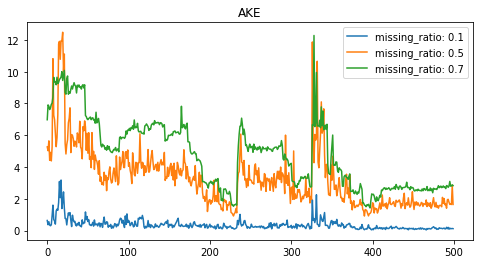

In [61]:
# plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(ake_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.plot(ake_loss_total[0],label='missing_ratio: {}'.format(0.1))
plt.plot(ake_loss_total[4],label='missing_ratio: {}'.format(0.5))
plt.plot(ake_loss_total[6],label='missing_ratio: {}'.format(0.7))


    
plt.title('AKE')
plt.legend()
plt.savefig('12_ake_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

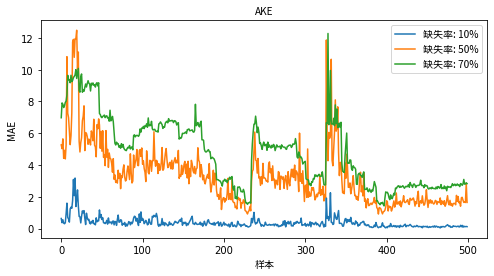

In [34]:
# plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(ake_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.plot(ake_loss_total[0],label='缺失率: {}%'.format(10))
plt.plot(ake_loss_total[4],label='缺失率: {}%'.format(50))
plt.plot(ake_loss_total[6],label='缺失率: {}%'.format(70))


plt.xlabel('样本',fontproperties = my_font)
plt.ylabel("MAE",fontproperties = my_font)
    
plt.title('AKE',fontproperties = my_font)
plt.legend(prop=my_font)
plt.savefig('21_ake_loss_total_500_11.png',dpi=300,bbox_inches='tight')

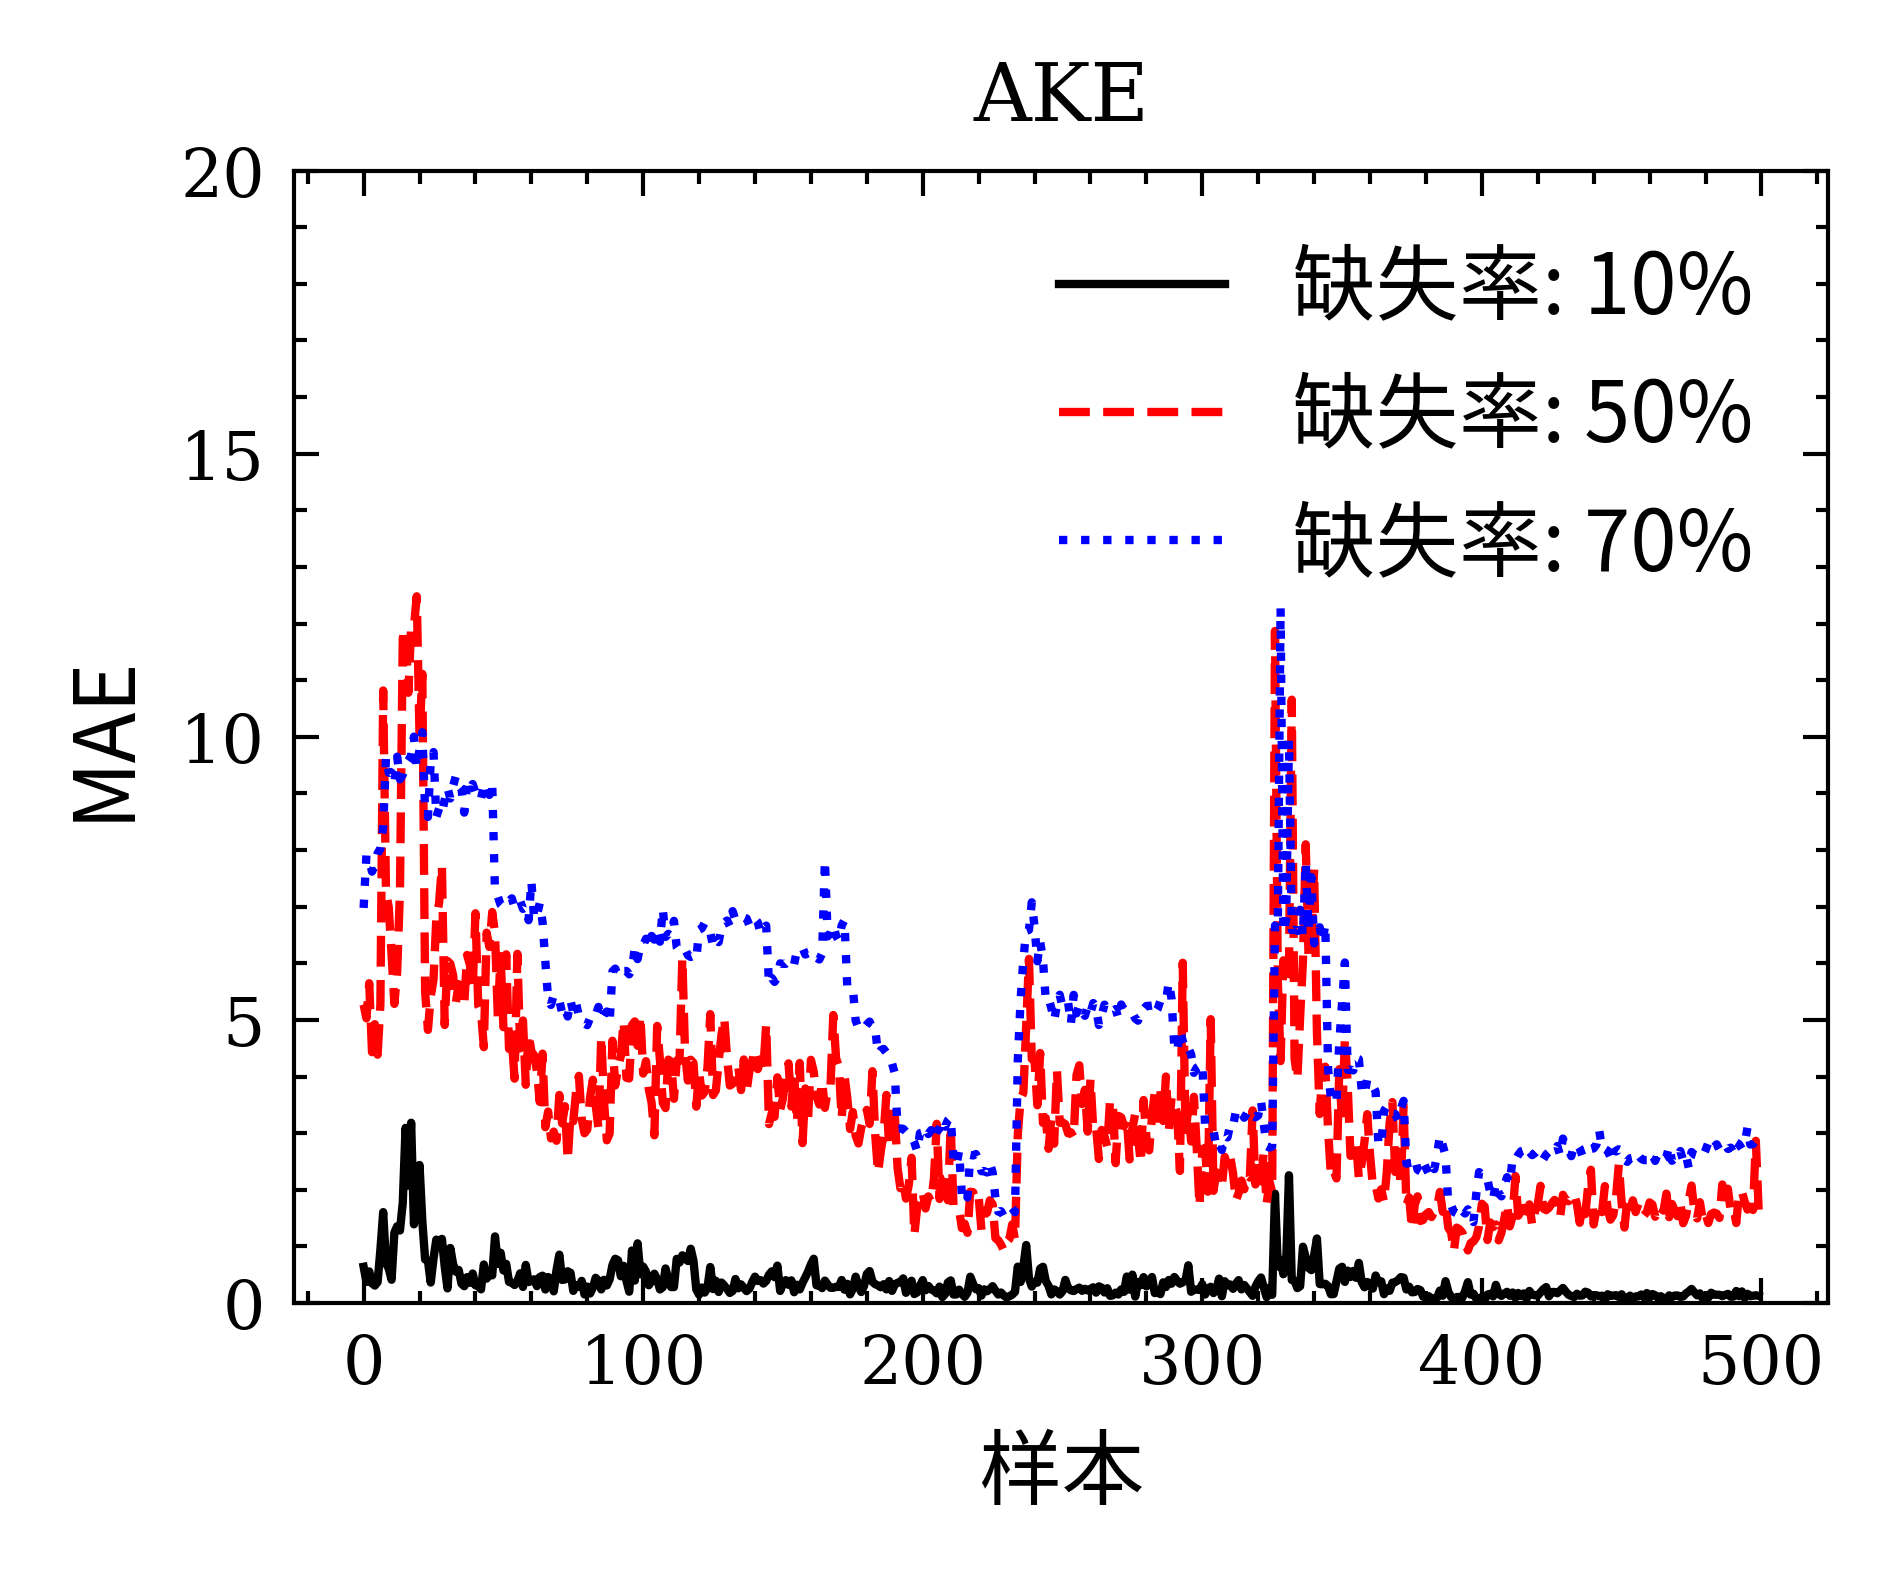

In [25]:
#
with plt.style.context(['science','ieee','no-latex','cjk-sc-font']):

    plt.plot(ake_loss_total[0],label='缺失率: {}%'.format(10))
    # plt.plot(dcs_loss_total[2],label='missing_ratio: {}'.format(0.3))
    plt.plot(ake_loss_total[4],label='缺失率: {}%'.format(50))
    plt.plot(ake_loss_total[6],label='缺失率: {}%'.format(70))
    # plt.plot(dcs_loss_total[8],label='missing_ratio: {}'.format(0.9))
    plt.ylim(0,20)
    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel("MAE",fontproperties = my_font)

    plt.title('AKE')
    plt.legend(prop=my_font)
    plt.savefig('20_ake_loss_total_500_11.png',dpi=300,bbox_inches='tight')

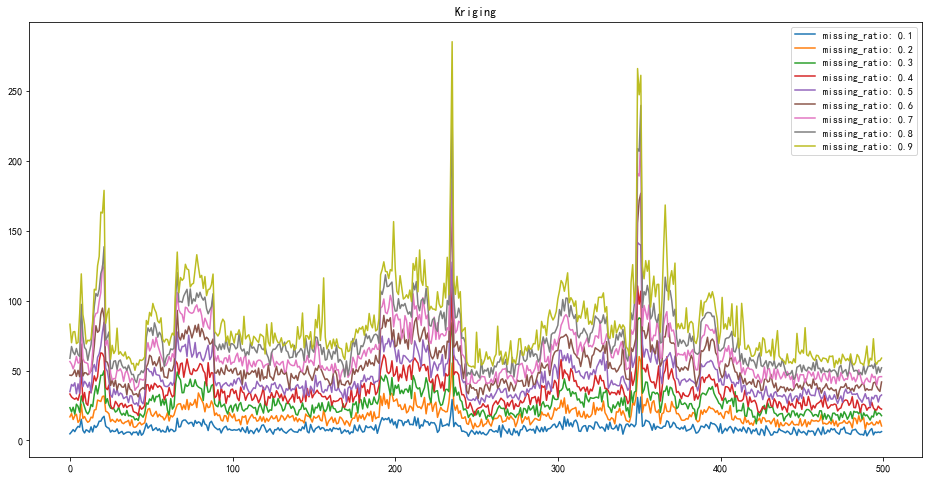

In [62]:
plt.rcParams['figure.figsize']=(16,8)
for i,ake in enumerate(kriging_loss_total):
    plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.title('Kriging')
plt.legend()
plt.savefig('5_kriging_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

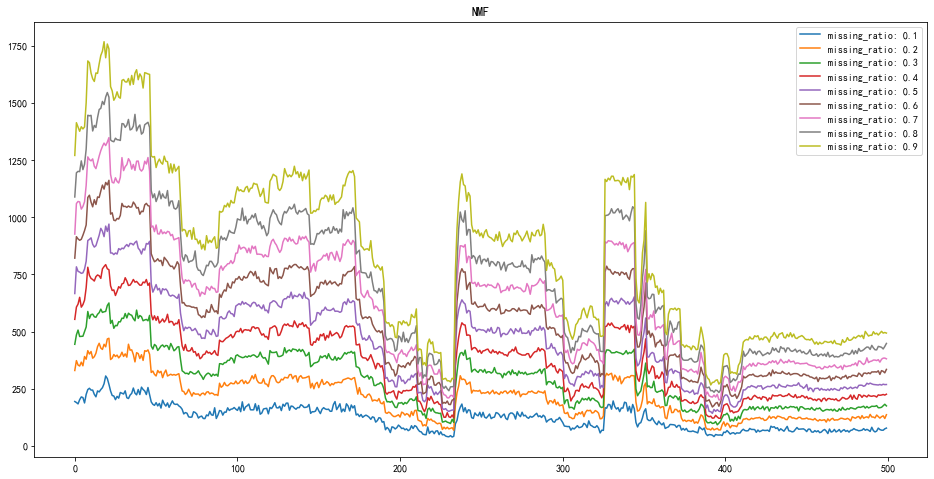

In [63]:
plt.rcParams['figure.figsize']=(16,8)
for i,ake in enumerate(nmf_loss_total):
    plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.title('NMF')
plt.legend()
plt.savefig('5_nmf_loss_total_500_11.png',dpi=300,bbox_inches='tight',pad_inches=0)

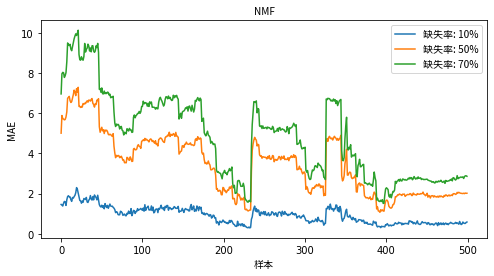

In [8]:
# plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.figsize']=(8,4)
# for i,ake in enumerate(ake_loss_total):
#     plt.plot(ake,label='missing_ratio: 0.{}'.format(i+1))

plt.plot(nmf_loss_total[0],label='缺失率: {}%'.format(10))
plt.plot(nmf_loss_total[4],label='缺失率: {}%'.format(50))
plt.plot(nmf_loss_total[6],label='缺失率: {}%'.format(70))


plt.xlabel('样本',fontproperties = my_font)
plt.ylabel("MAE",fontproperties = my_font)
    
plt.title('NMF',fontproperties = my_font)
plt.legend(prop=my_font)
plt.savefig('21_nmf_loss_total_500_11.png',dpi=300,bbox_inches='tight')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


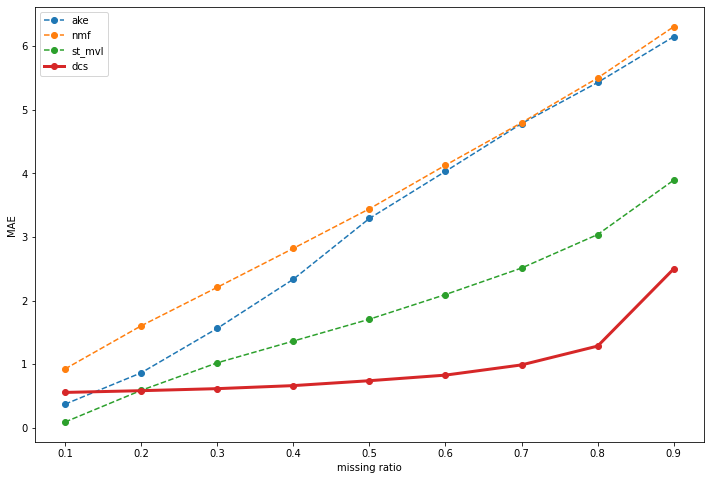

In [10]:
# mean loss 与missing ratio的对比关系
ake_mean = []
# kriging_mean = []
nmf_mean = []
st_mvl_mean = []
dcs_mean = []
dcs_mean1 = []
dcs_mean2 = []

for i,j in enumerate(ake_loss_total):
    ake_mean.append(np.mean(ake_loss_total[i]))
#     kriging_mean.append(np.mean(kriging_loss_total[i]))
    nmf_mean.append(np.mean(nmf_loss_total[i]))
    st_mvl_mean.append(np.mean(st_mvl_loss_total[i]))
    dcs_mean.append(np.mean(dcs_loss_total[i]))
    dcs_mean1.append(np.mean(dcs_loss_total1[i]))
    dcs_mean2.append(np.mean(dcs_loss_total2[i]))

x_plot = np.arange(0.1,1,0.1)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.figsize']=(12,8)
plt.plot(x_plot,ake_mean,marker='o',ls='--',label='ake')
# plt.plot(x_plot,kriging_mean,marker='o',ls='--',label='kriging')
plt.plot(x_plot,nmf_mean,marker='o',ls='--',label='nmf')
plt.plot(x_plot,st_mvl_mean,marker='o',ls='--',label='st_mvl')
# plt.plot(x_plot,dcs_mean,marker='o',linewidth=3,label='dcs_sa') # 不带有迭代限制的原始版
# plt.plot(x_plot,dcs_mean1,marker='o',linewidth=3,label='dcs')
plt.plot(x_plot,dcs_mean2,marker='o',linewidth=3,label='dcs') # 带有迭代次数限制的完整版

plt.xlabel('missing ratio')
# plt.ylabel('误差      ',rotation=0)
plt.ylabel('MAE')
# plt.xticks(np.arange(1,10,1))
plt.legend()
# plt.savefig('12_mean_loss_bench.png',dpi=300,bbox_inches='tight',pad_inches=0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Noto Serif CJK SC


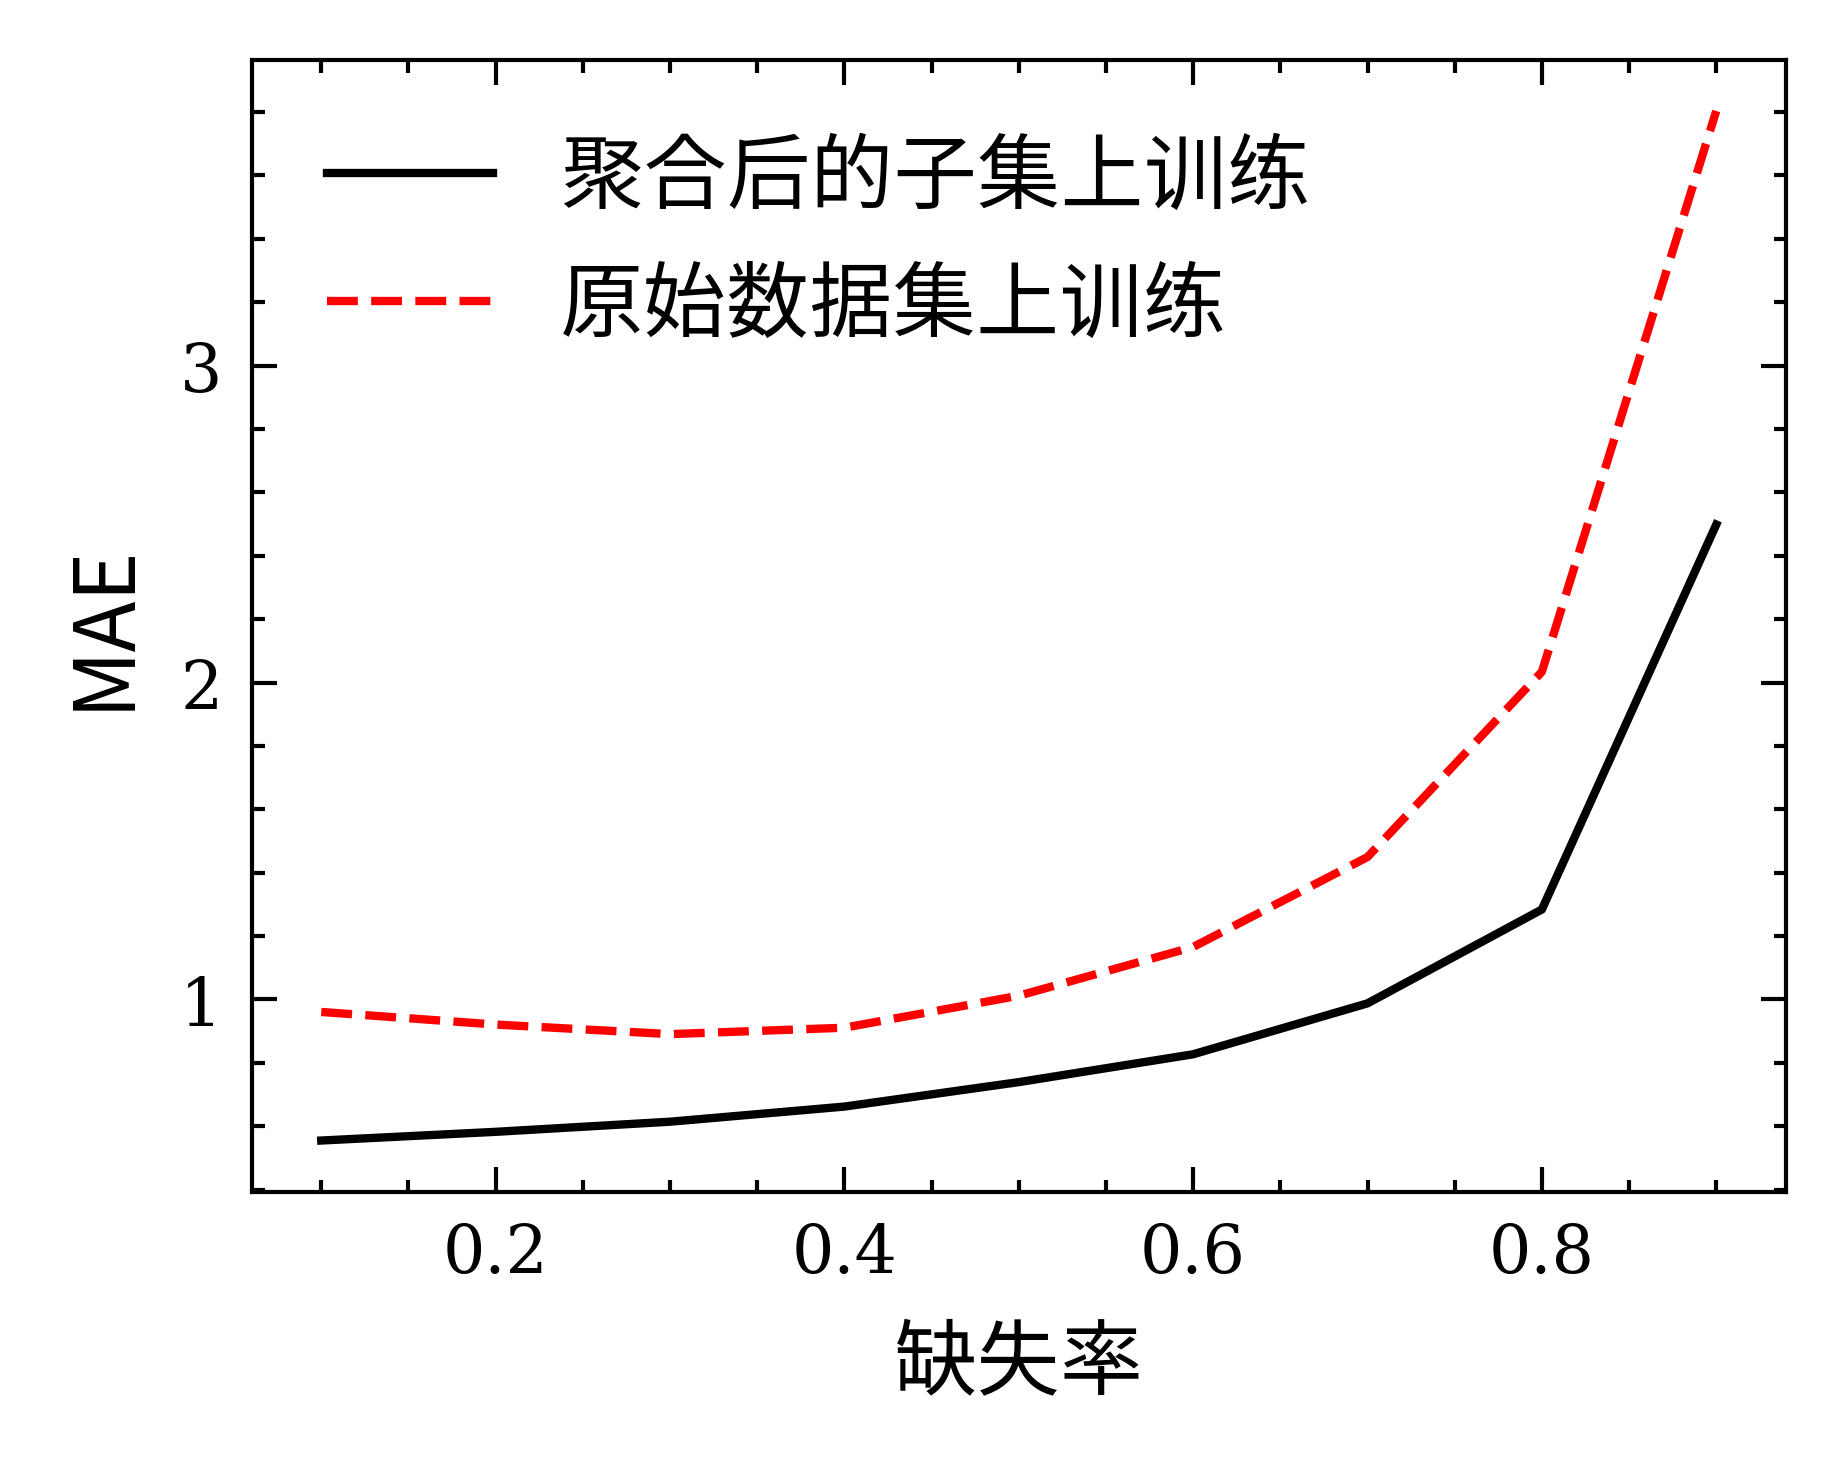

In [17]:
# mean loss 与missing ratio的对比关系

from matplotlib import rc
import matplotlib.font_manager as mf

my_font= mf.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc') # 加载字体
rc('text',usetex=False) # 去取消利用Latex渲染标签

ake_mean = []
# kriging_mean = []
nmf_mean = []
st_mvl_mean = []
dcs_mean = []
dcs_mean1 = []
dcs_mean2 = []

for i,j in enumerate(ake_loss_total):
    ake_mean.append(np.mean(ake_loss_total[i]))
#     kriging_mean.append(np.mean(kriging_loss_total[i]))
    nmf_mean.append(np.mean(nmf_loss_total[i]))
    st_mvl_mean.append(np.mean(st_mvl_loss_total[i]))
    dcs_mean.append(np.mean(dcs_loss_total[i]))
    dcs_mean1.append(np.mean(dcs_loss_total1[i]))
    dcs_mean2.append(np.mean(dcs_loss_total2[i]))

x_plot = np.arange(0.1,1,0.1)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.figsize']=(12,8)

with plt.style.context(['science','ieee','no-latex','cjk-sc-font']) :

    plt.plot(x_plot,dcs_mean2,label='聚合后的子集上训练') # 带有迭代次数限制的完整版
    # plt.plot(x_plot,ake_mean,label='ake')
# plt.plot(x_plot,kriging_mean,marker='o',ls='--',label='kriging')
    # plt.plot(x_plot,nmf_mean,label='nmf')
    # plt.plot(x_plot,st_mvl_mean,label='st_mvl')
# plt.plot(x_plot,dcs_mean,marker='o',linewidth=3,label='dcs_sa') # 不带有迭代限制的原始版
    plt.plot(x_plot,dcs_mean1,label='原始数据集上训练')

    plt.xlabel('缺失率',fontproperties = my_font)
# plt.ylabel('误差      ',rotation=0)
    plt.ylabel('MAE',fontproperties = my_font)
# plt.xticks(np.arange(1,10,1))
    plt.legend(prop=my_font)
    plt.savefig('20_dcs_mean_loss_bench_c.png',dpi=300)

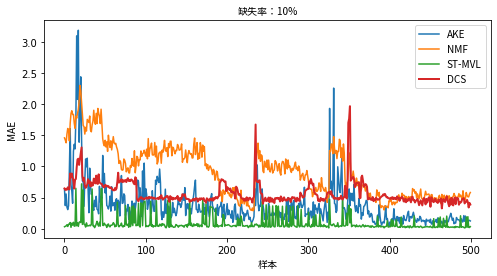

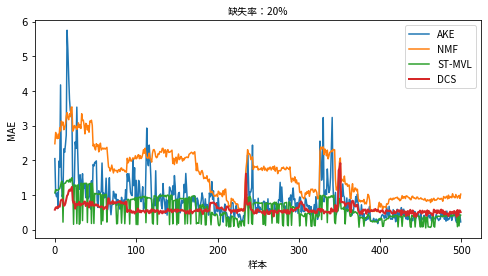

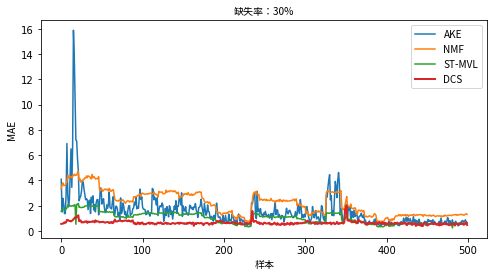

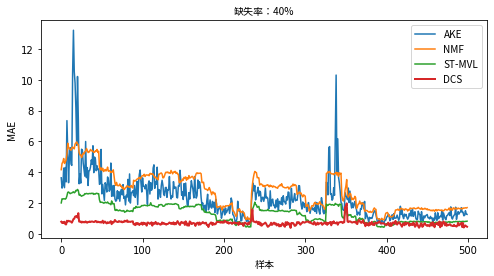

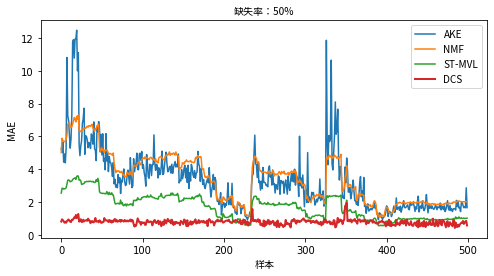

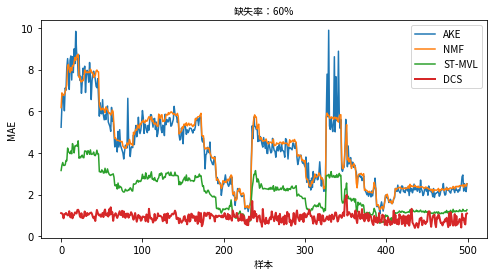

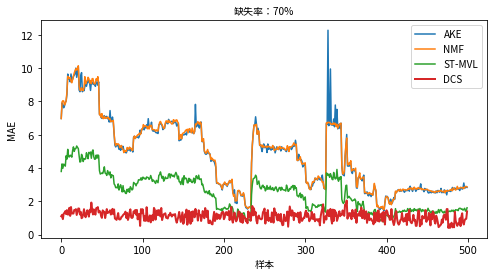

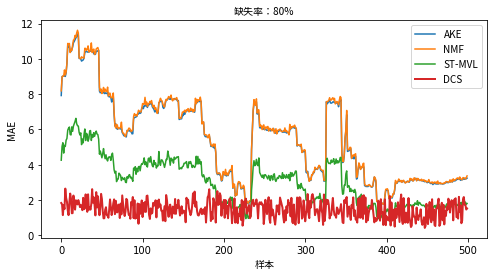

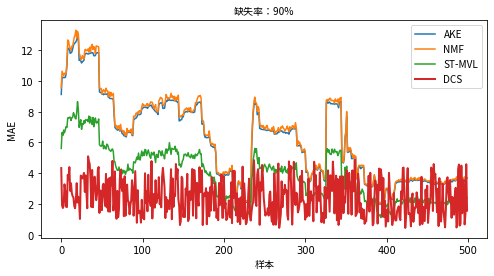

In [51]:
# per missing ratio

# ake_loss_total = []
# kriging_loss_total = []
# nmf_loss_total = []
# st_mvl_loss_total = []
# dcs_loss_total

plt.rcParams['figure.figsize']=(8,4)


# print(len(ake_loss_total))

for i in range(0,9,1):
#     ake_loss_total[i]
    plt.figure()
    # plt.ylim(-0,10)
    plt.plot(ake_loss_total[i],label='AKE')
    # plt.plot(kriging_loss_total[i],label='kriging_loss')
    plt.plot(nmf_loss_total[i],label='NMF')
    plt.plot(st_mvl_loss_total[i],label='ST-MVL')
    # plt.plot(dcs_loss_total[i],linewidth=1,label='dcs_loss_sa') # 原始模型, 无迭代次数限制
    # plt.plot(dcs_loss_total2[i],linewidth=1,label='dcs_loss')
    plt.plot(dcs_loss_total3[i],linewidth=2,label='DCS') # 带次数限制的版本

    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel("MAE",fontproperties = my_font)
    plt.title('缺失率：{}%'.format((i+1)*10),fontproperties = my_font)

    plt.legend(prop=my_font)
    # plt.savefig('13_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
    plt.savefig('21_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight')# miss_ratio = 0.1
    # plt.savefig('11_dcs_compare_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
# indices = int(miss_ratio*10-1)
# print(indices)

# size = 1000
# plt.rcParams['figure.figsize']=(12,8)
# # x_plot = np.arange(0,29834,1)
# plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
# plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
# plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
# plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
# plt.legend()
# plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

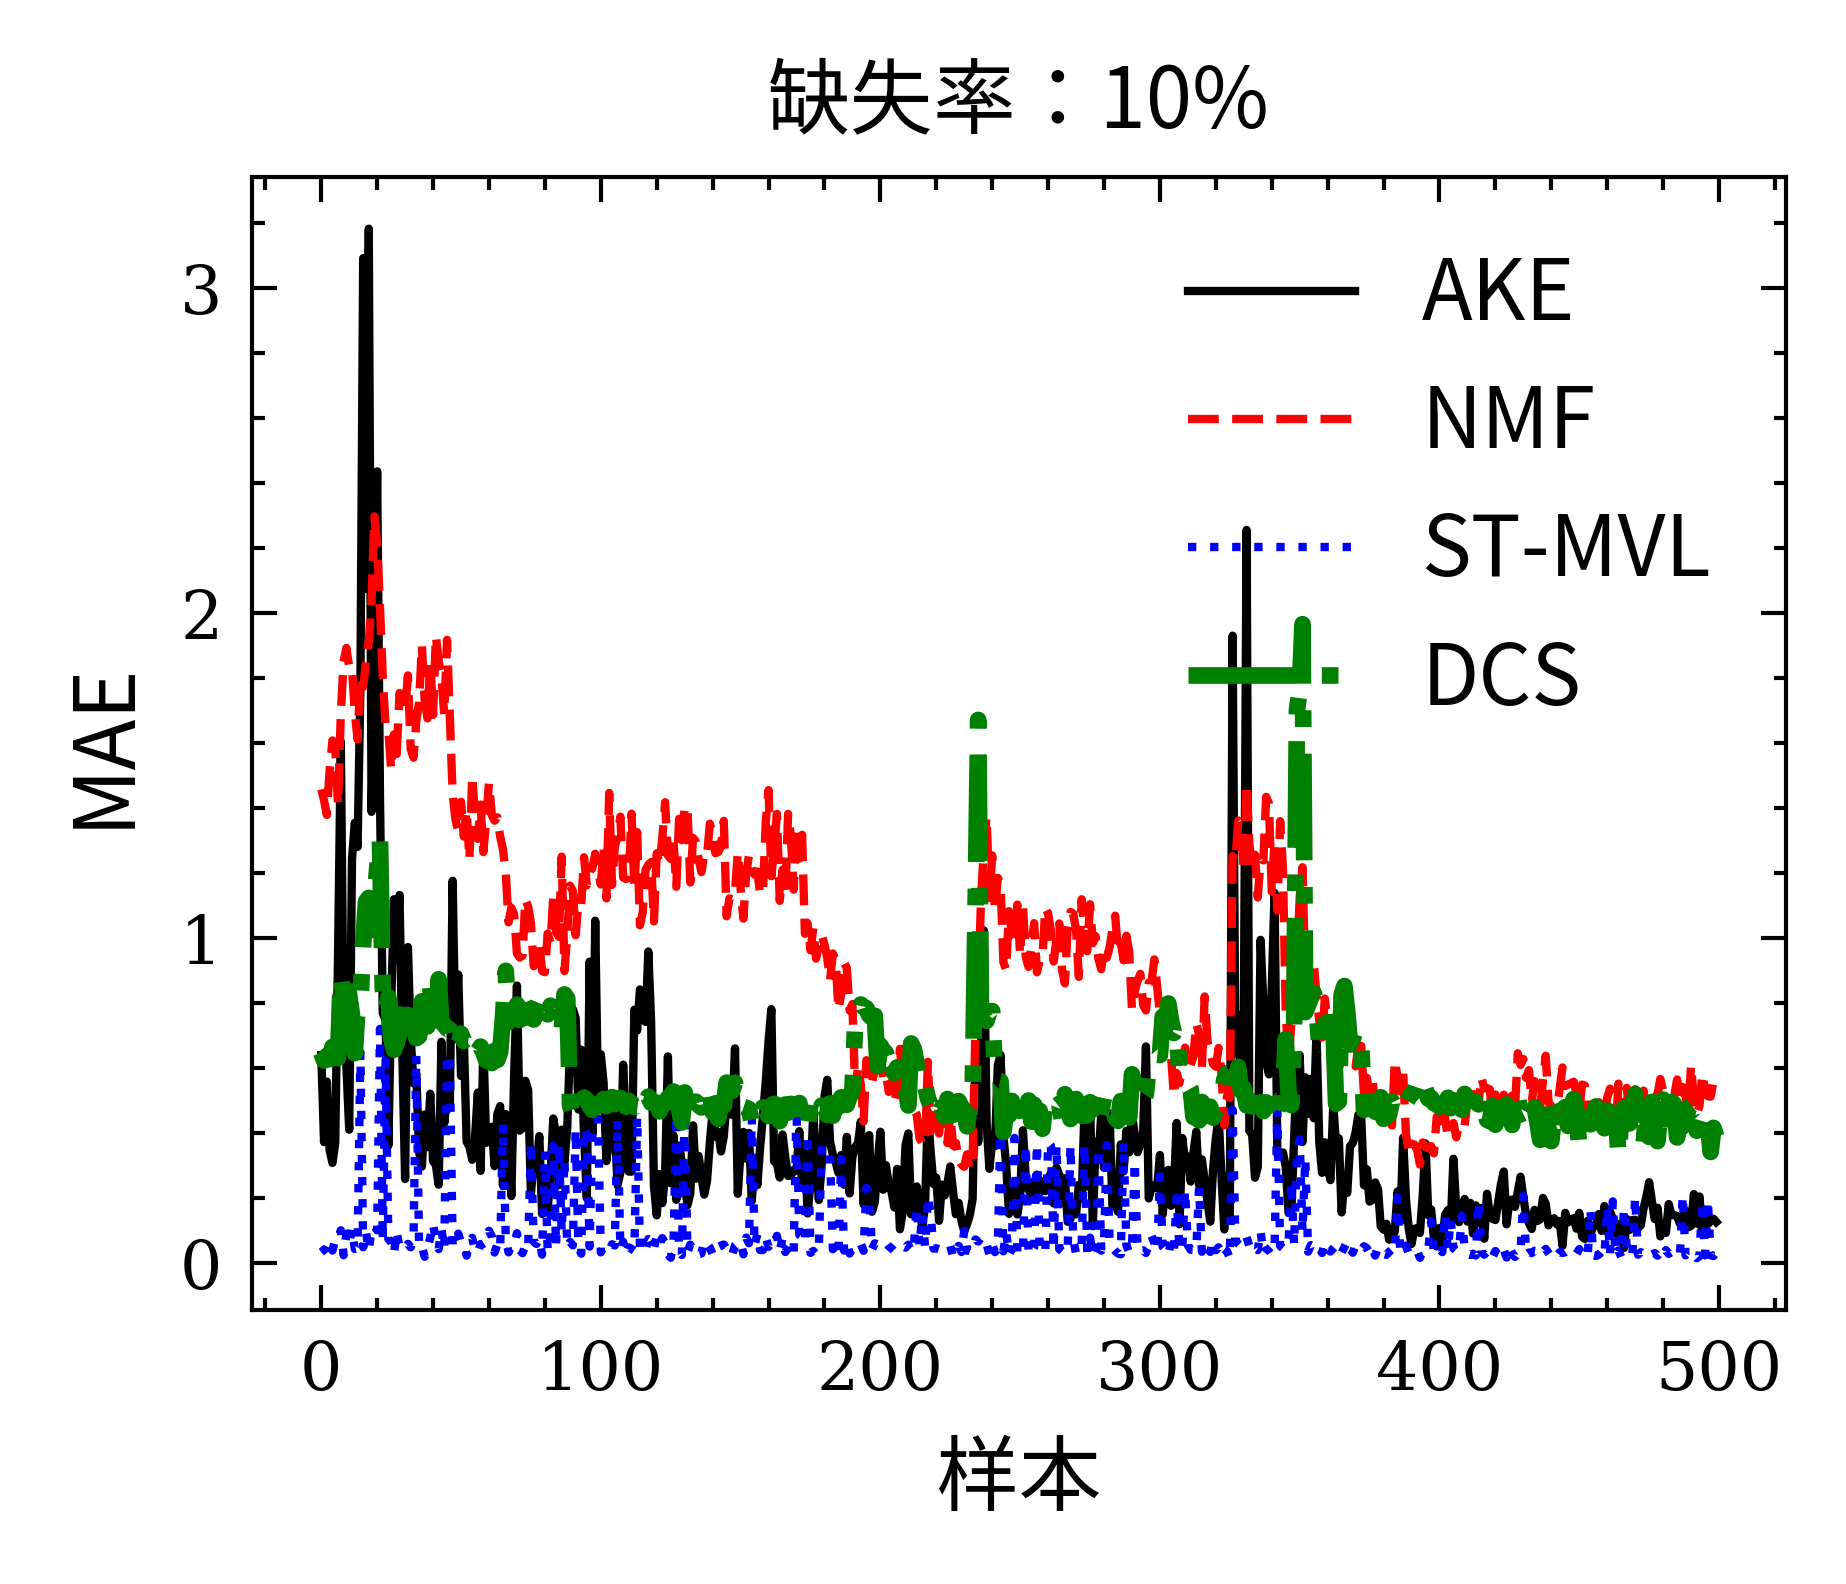

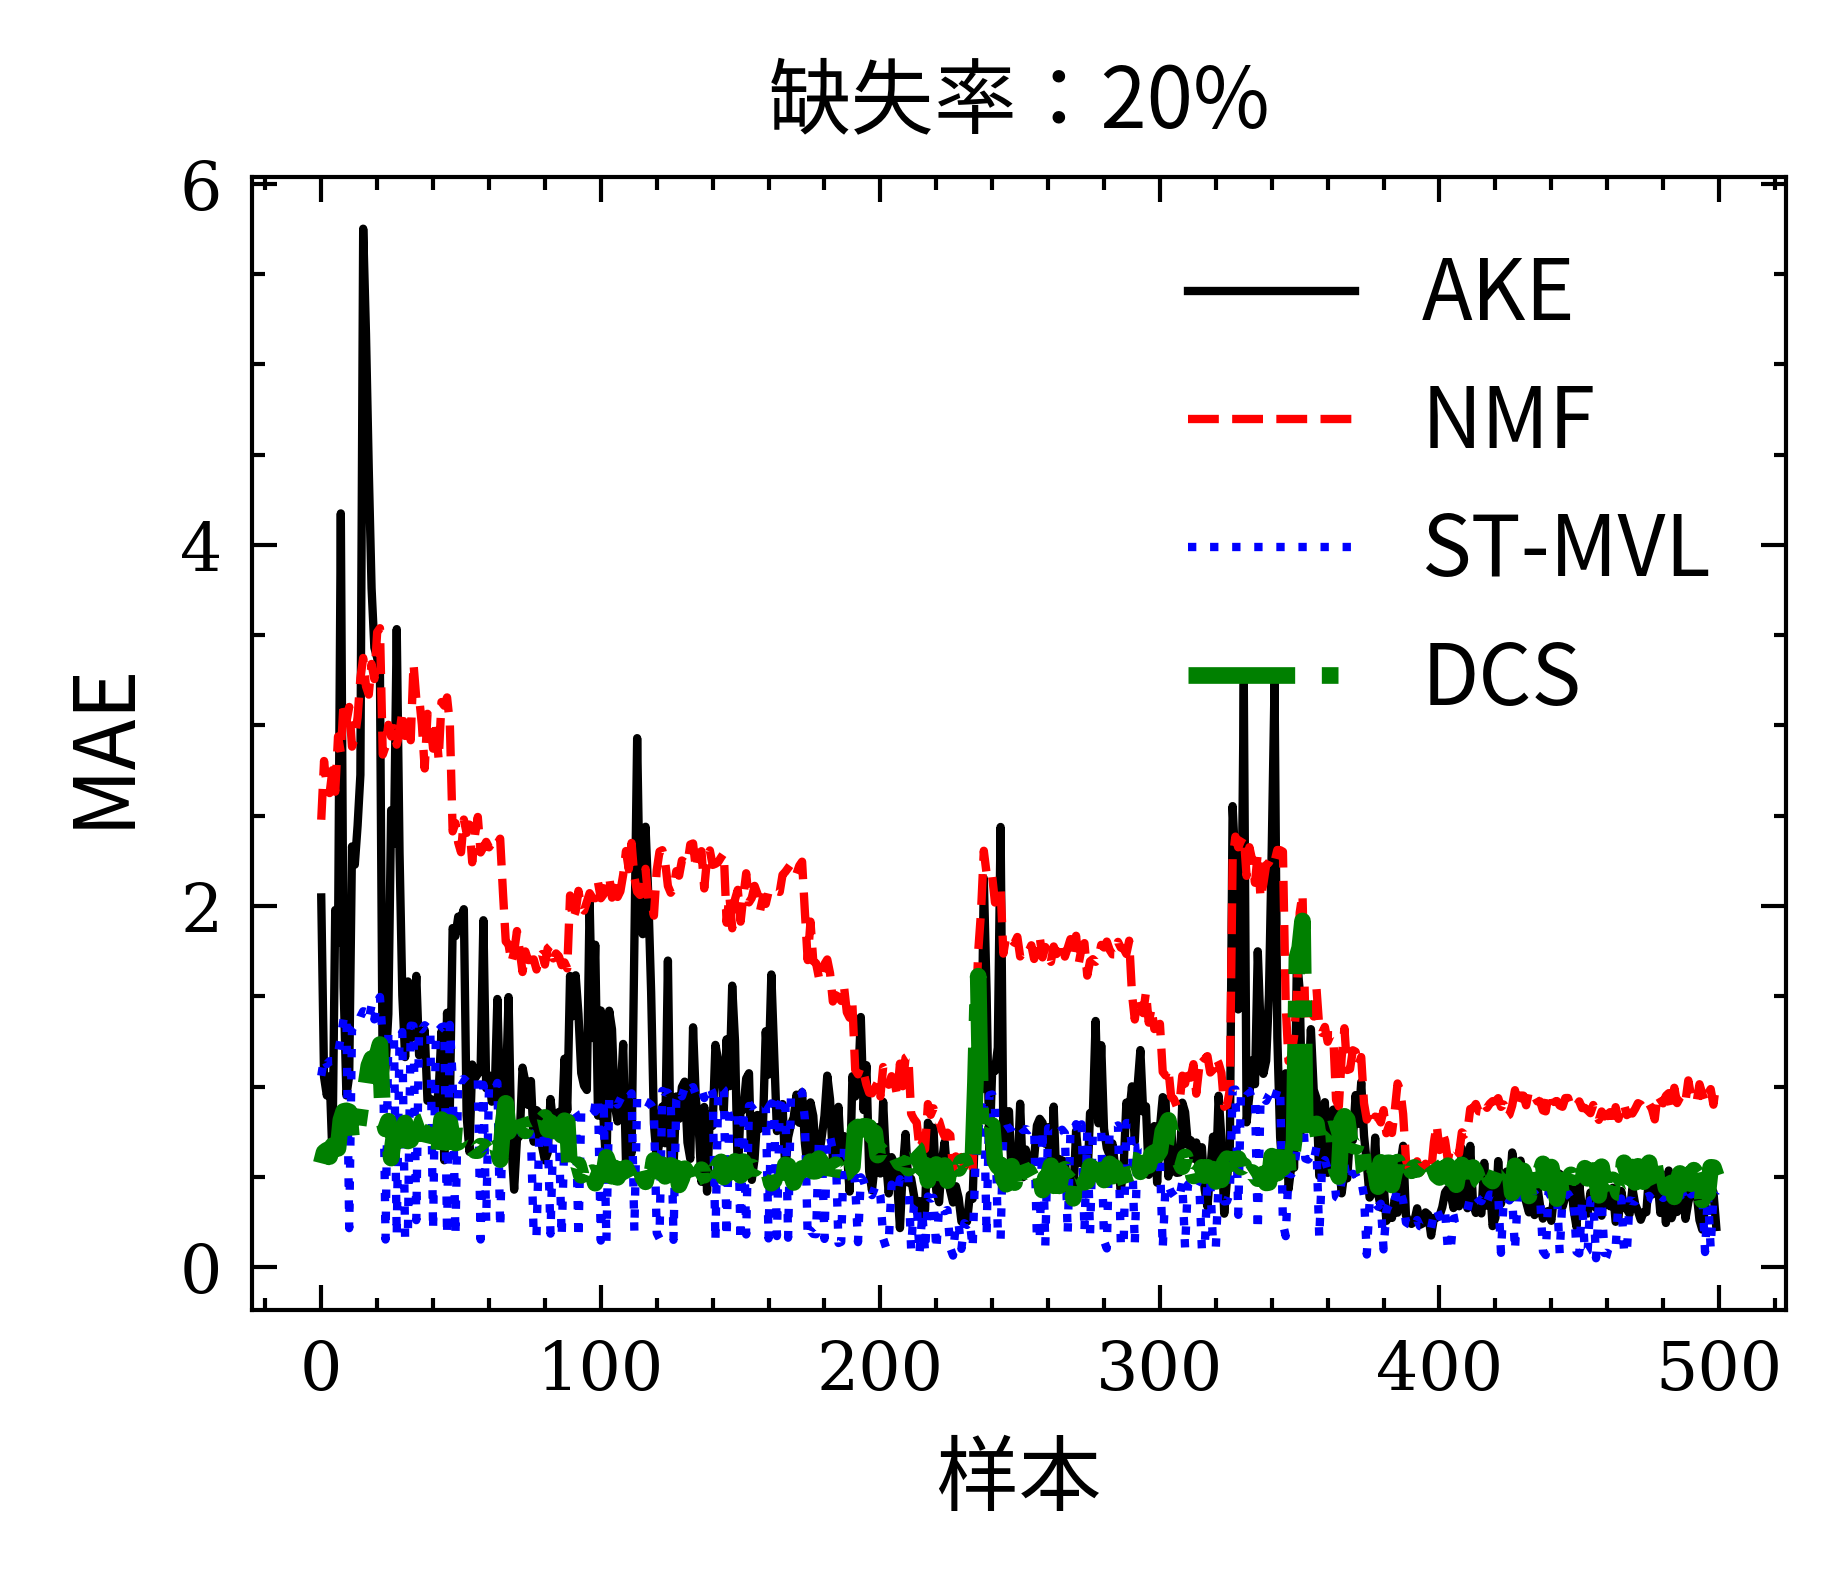

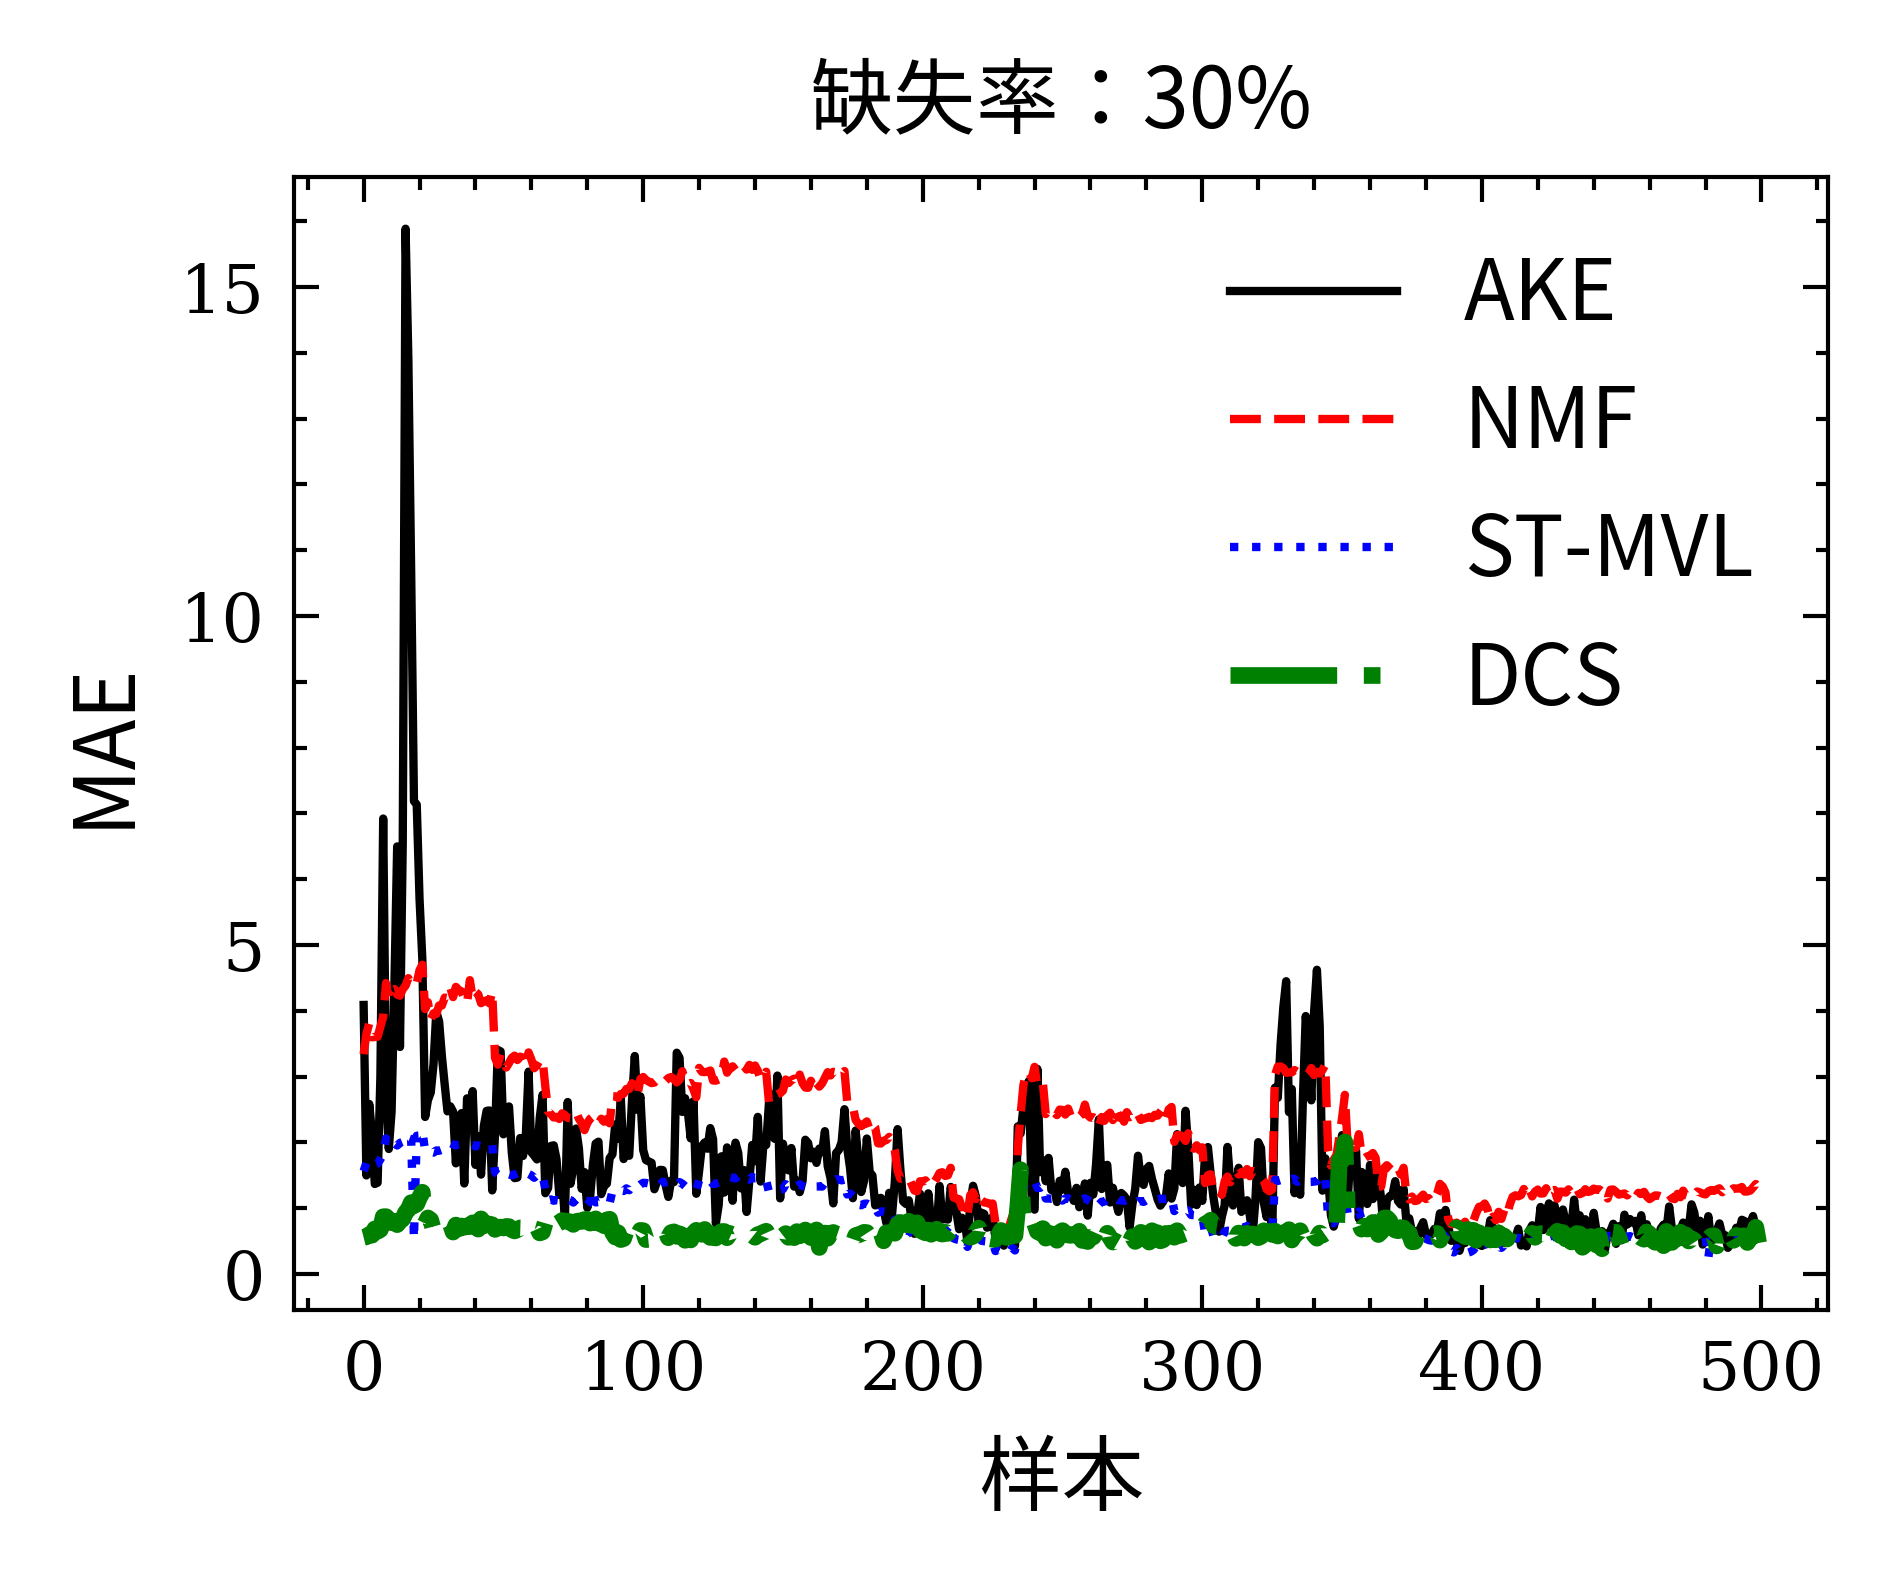

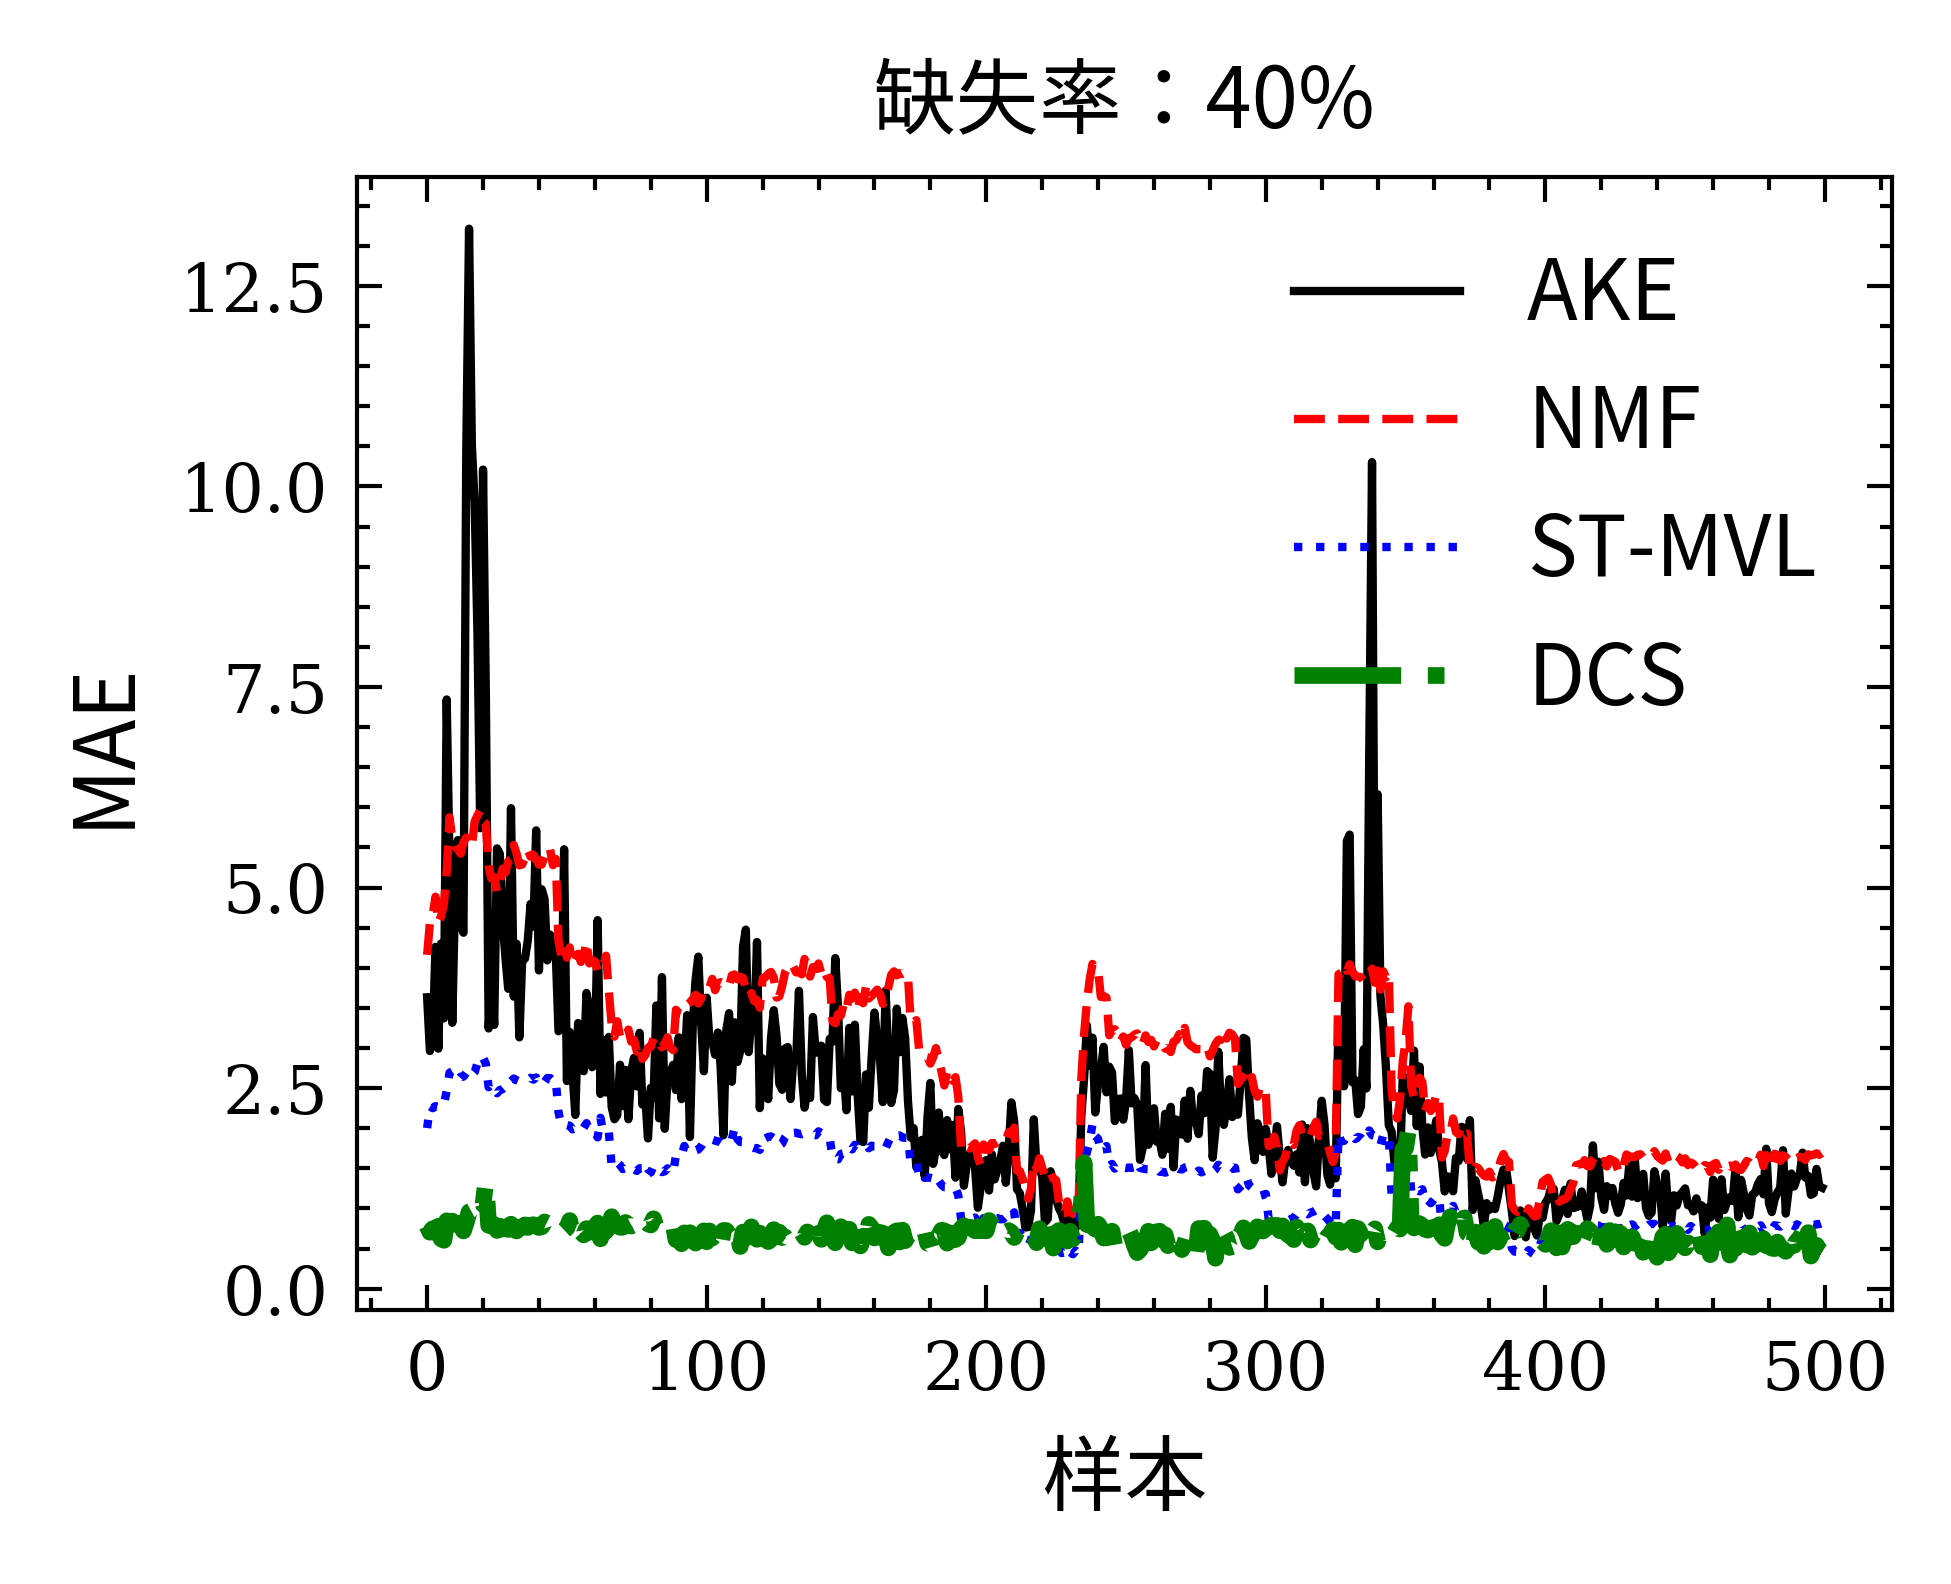

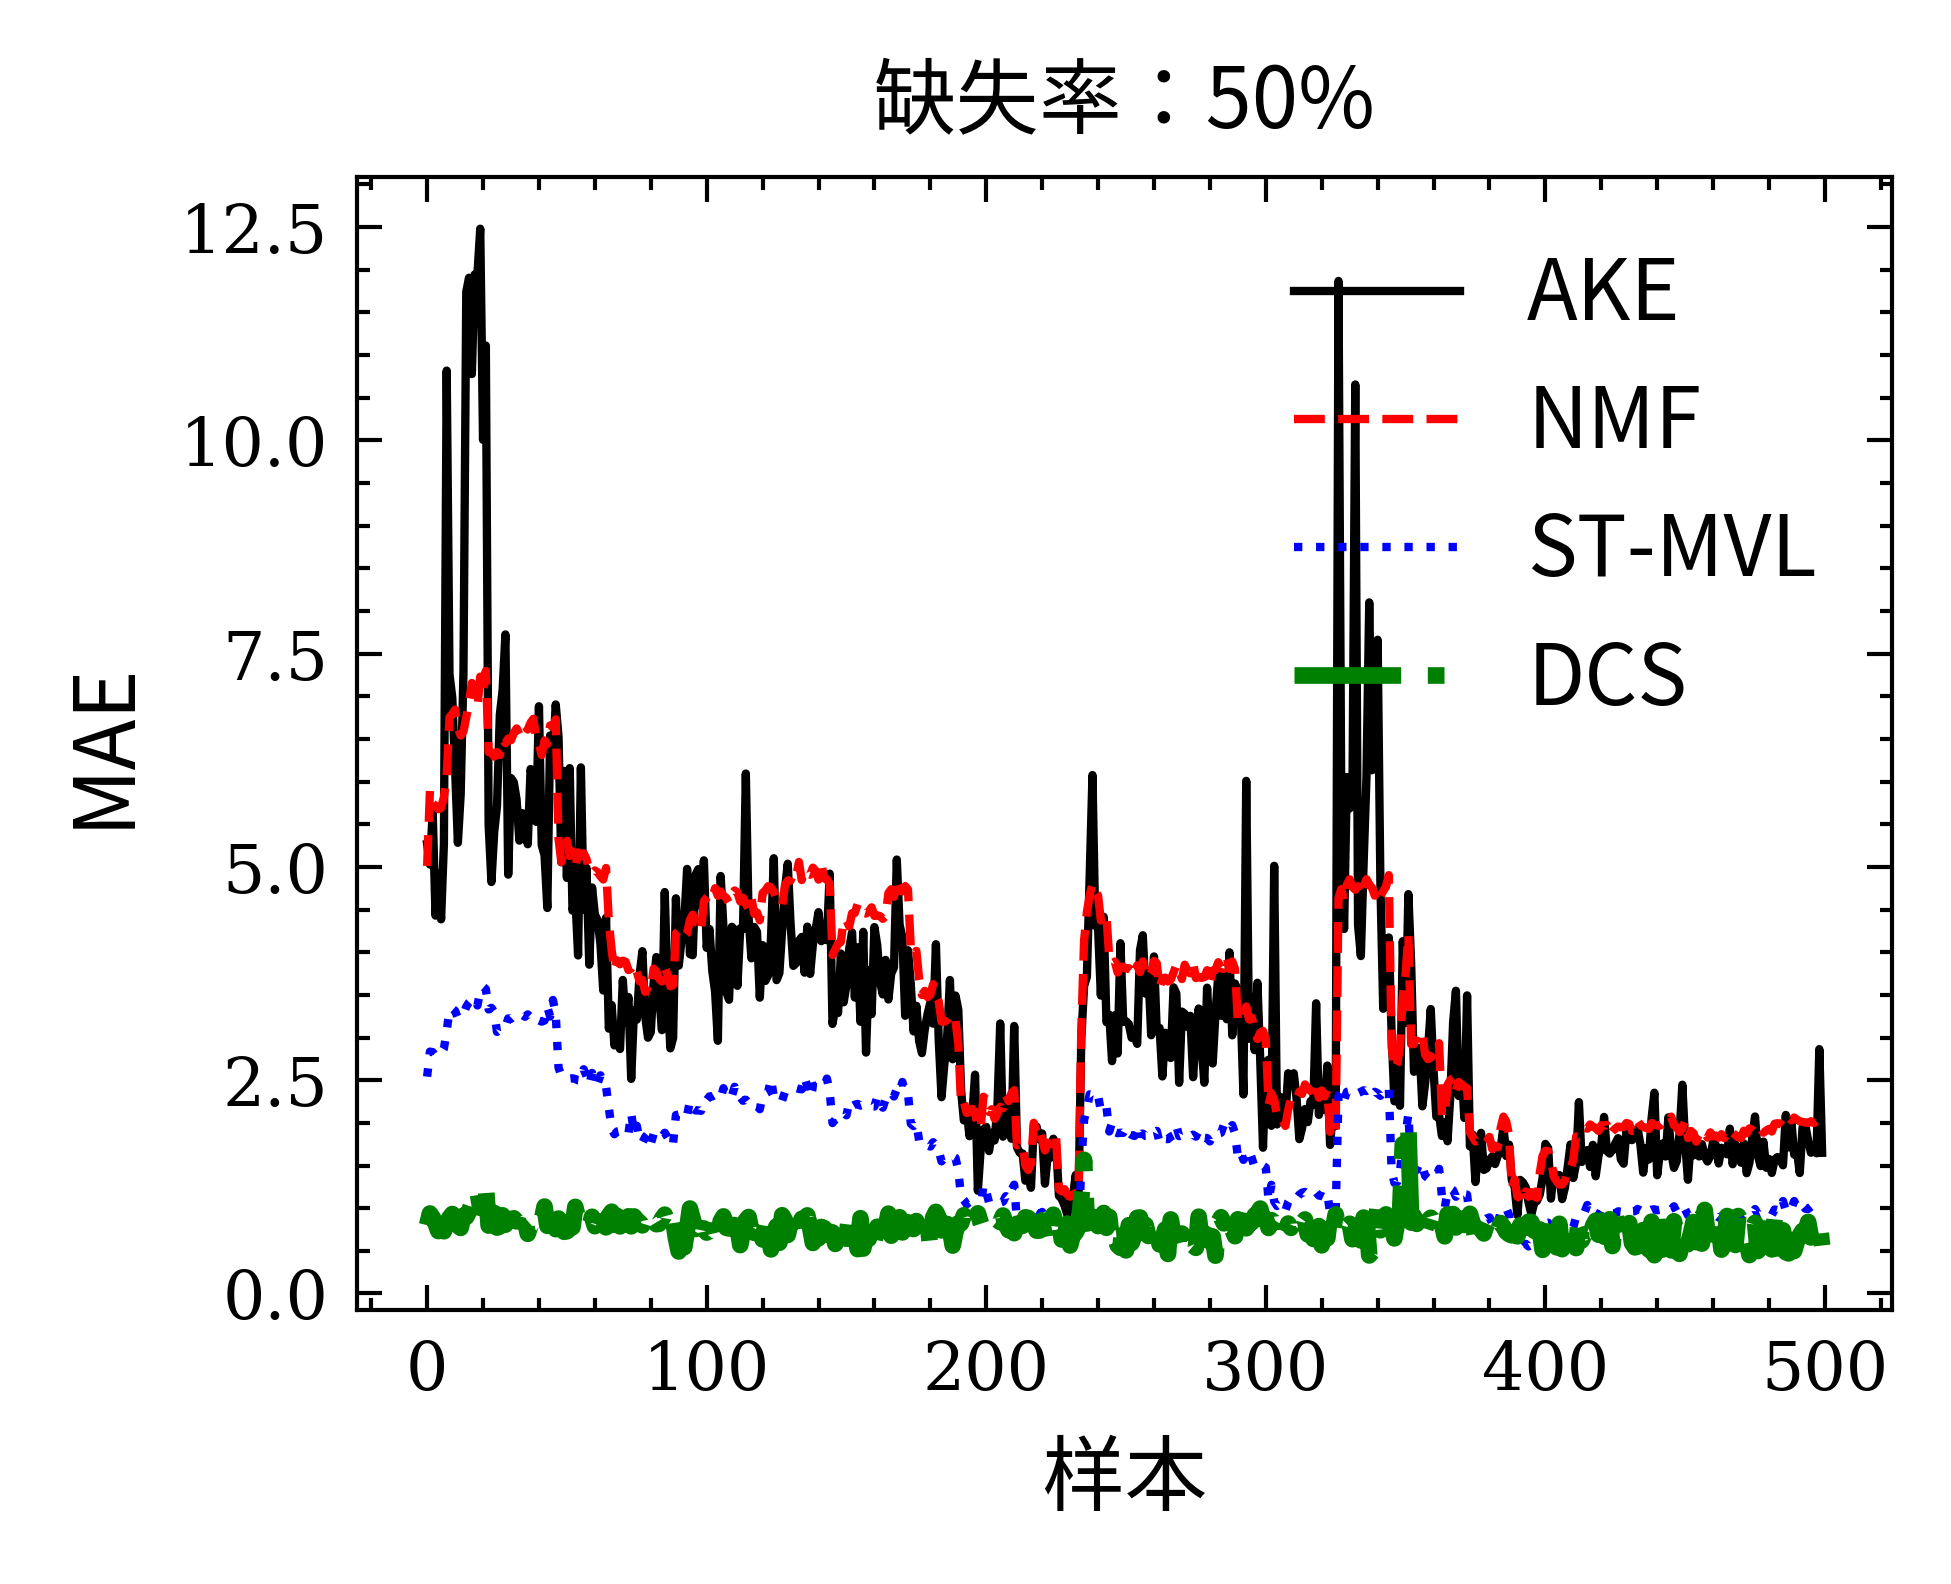

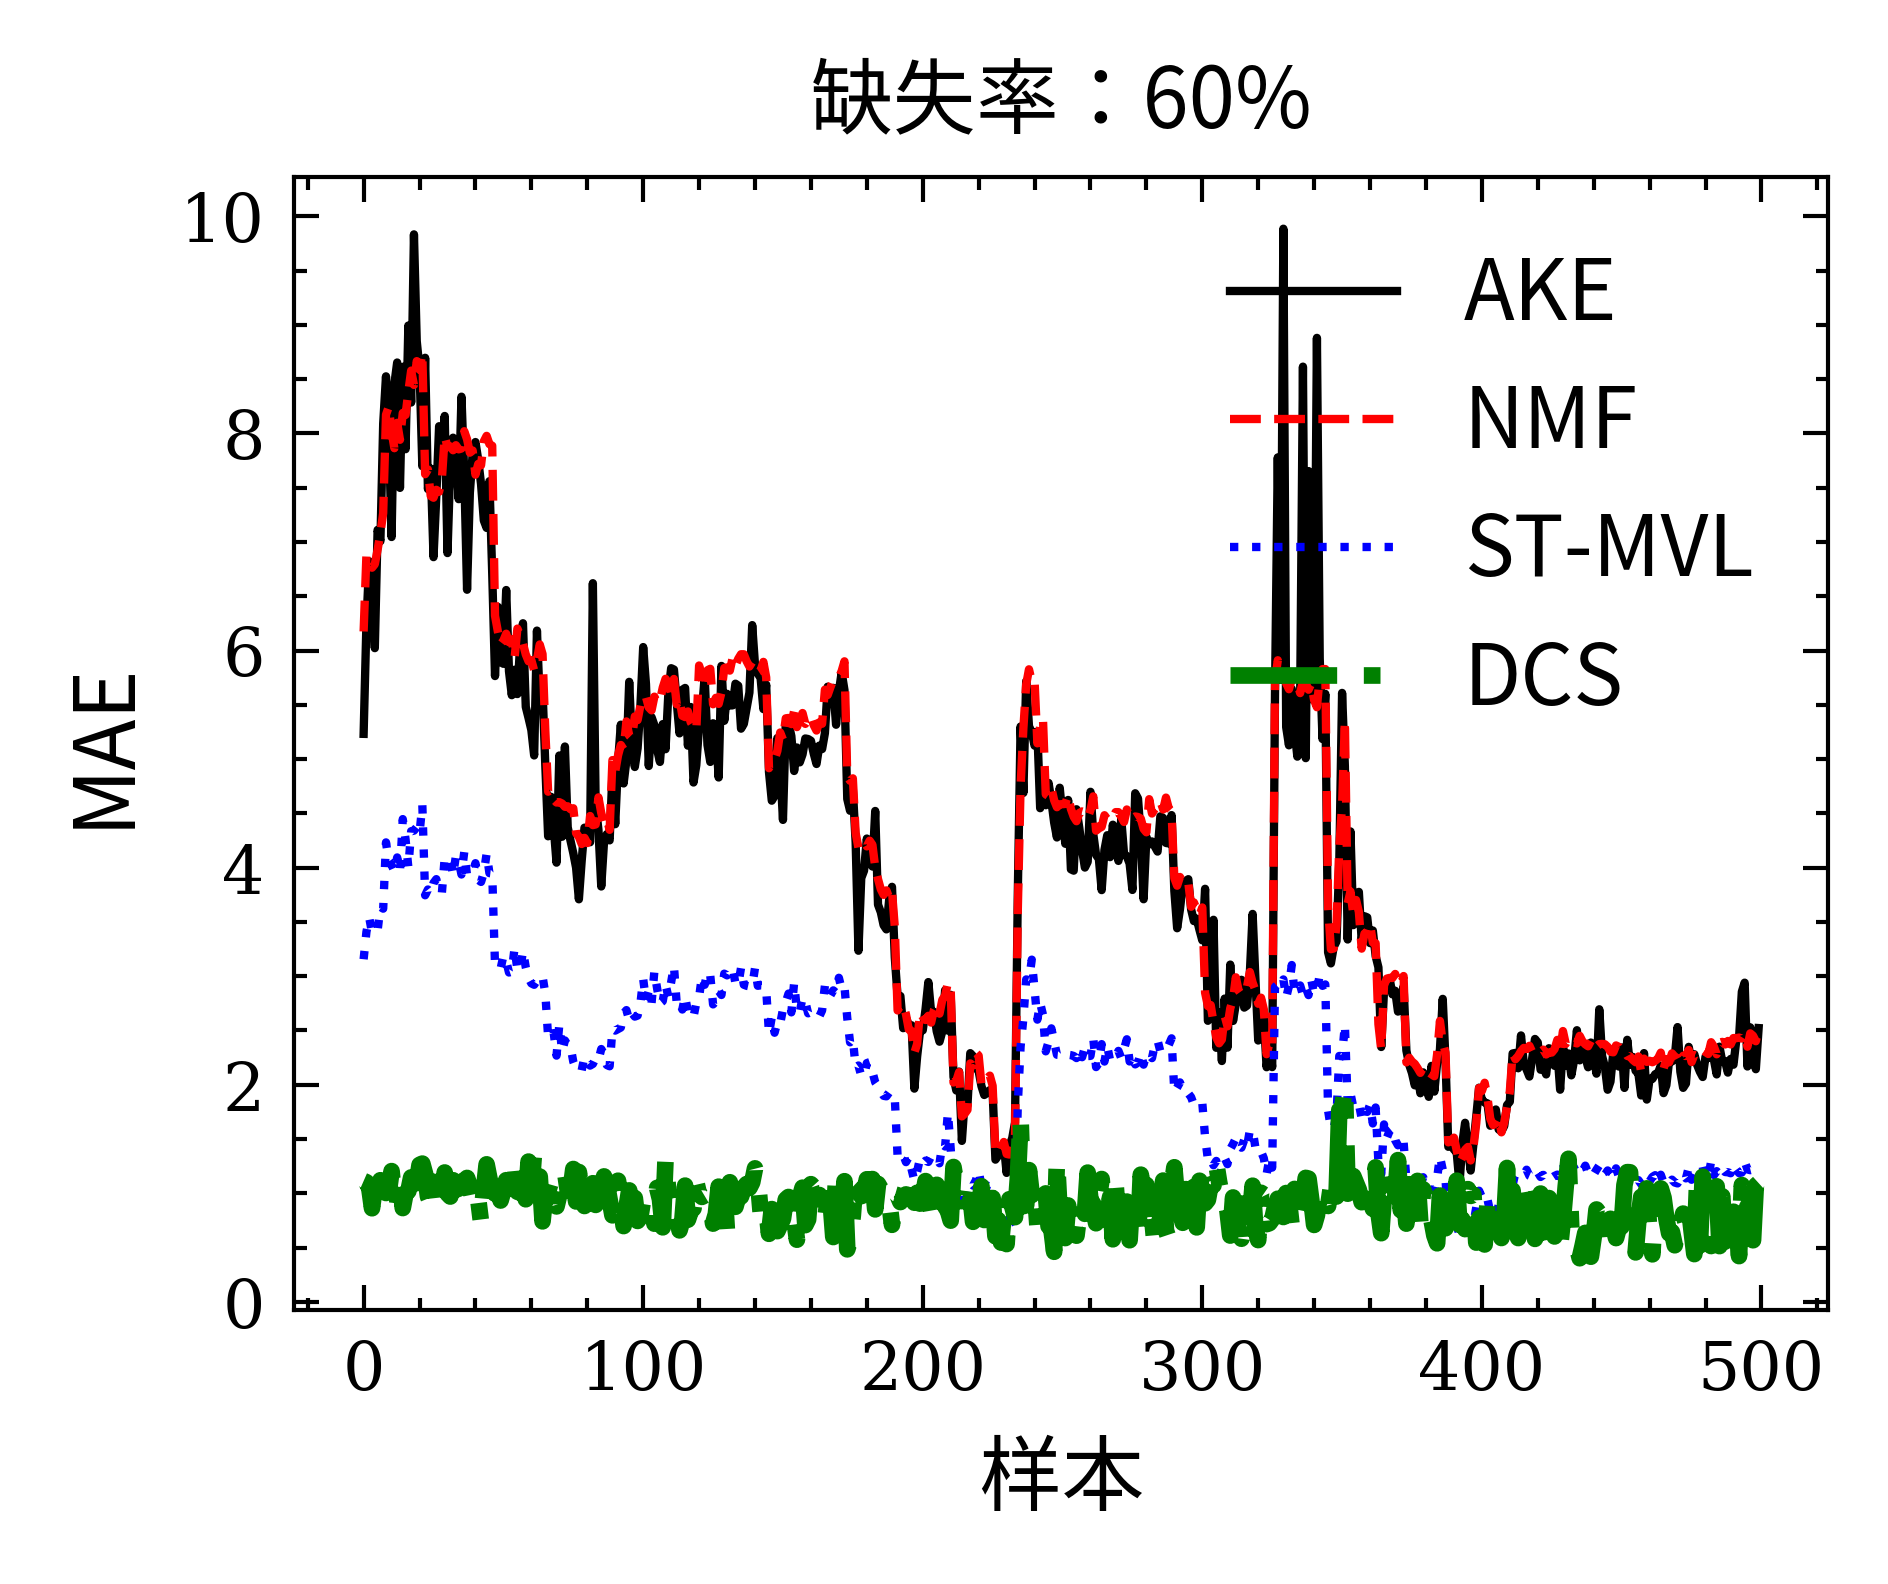

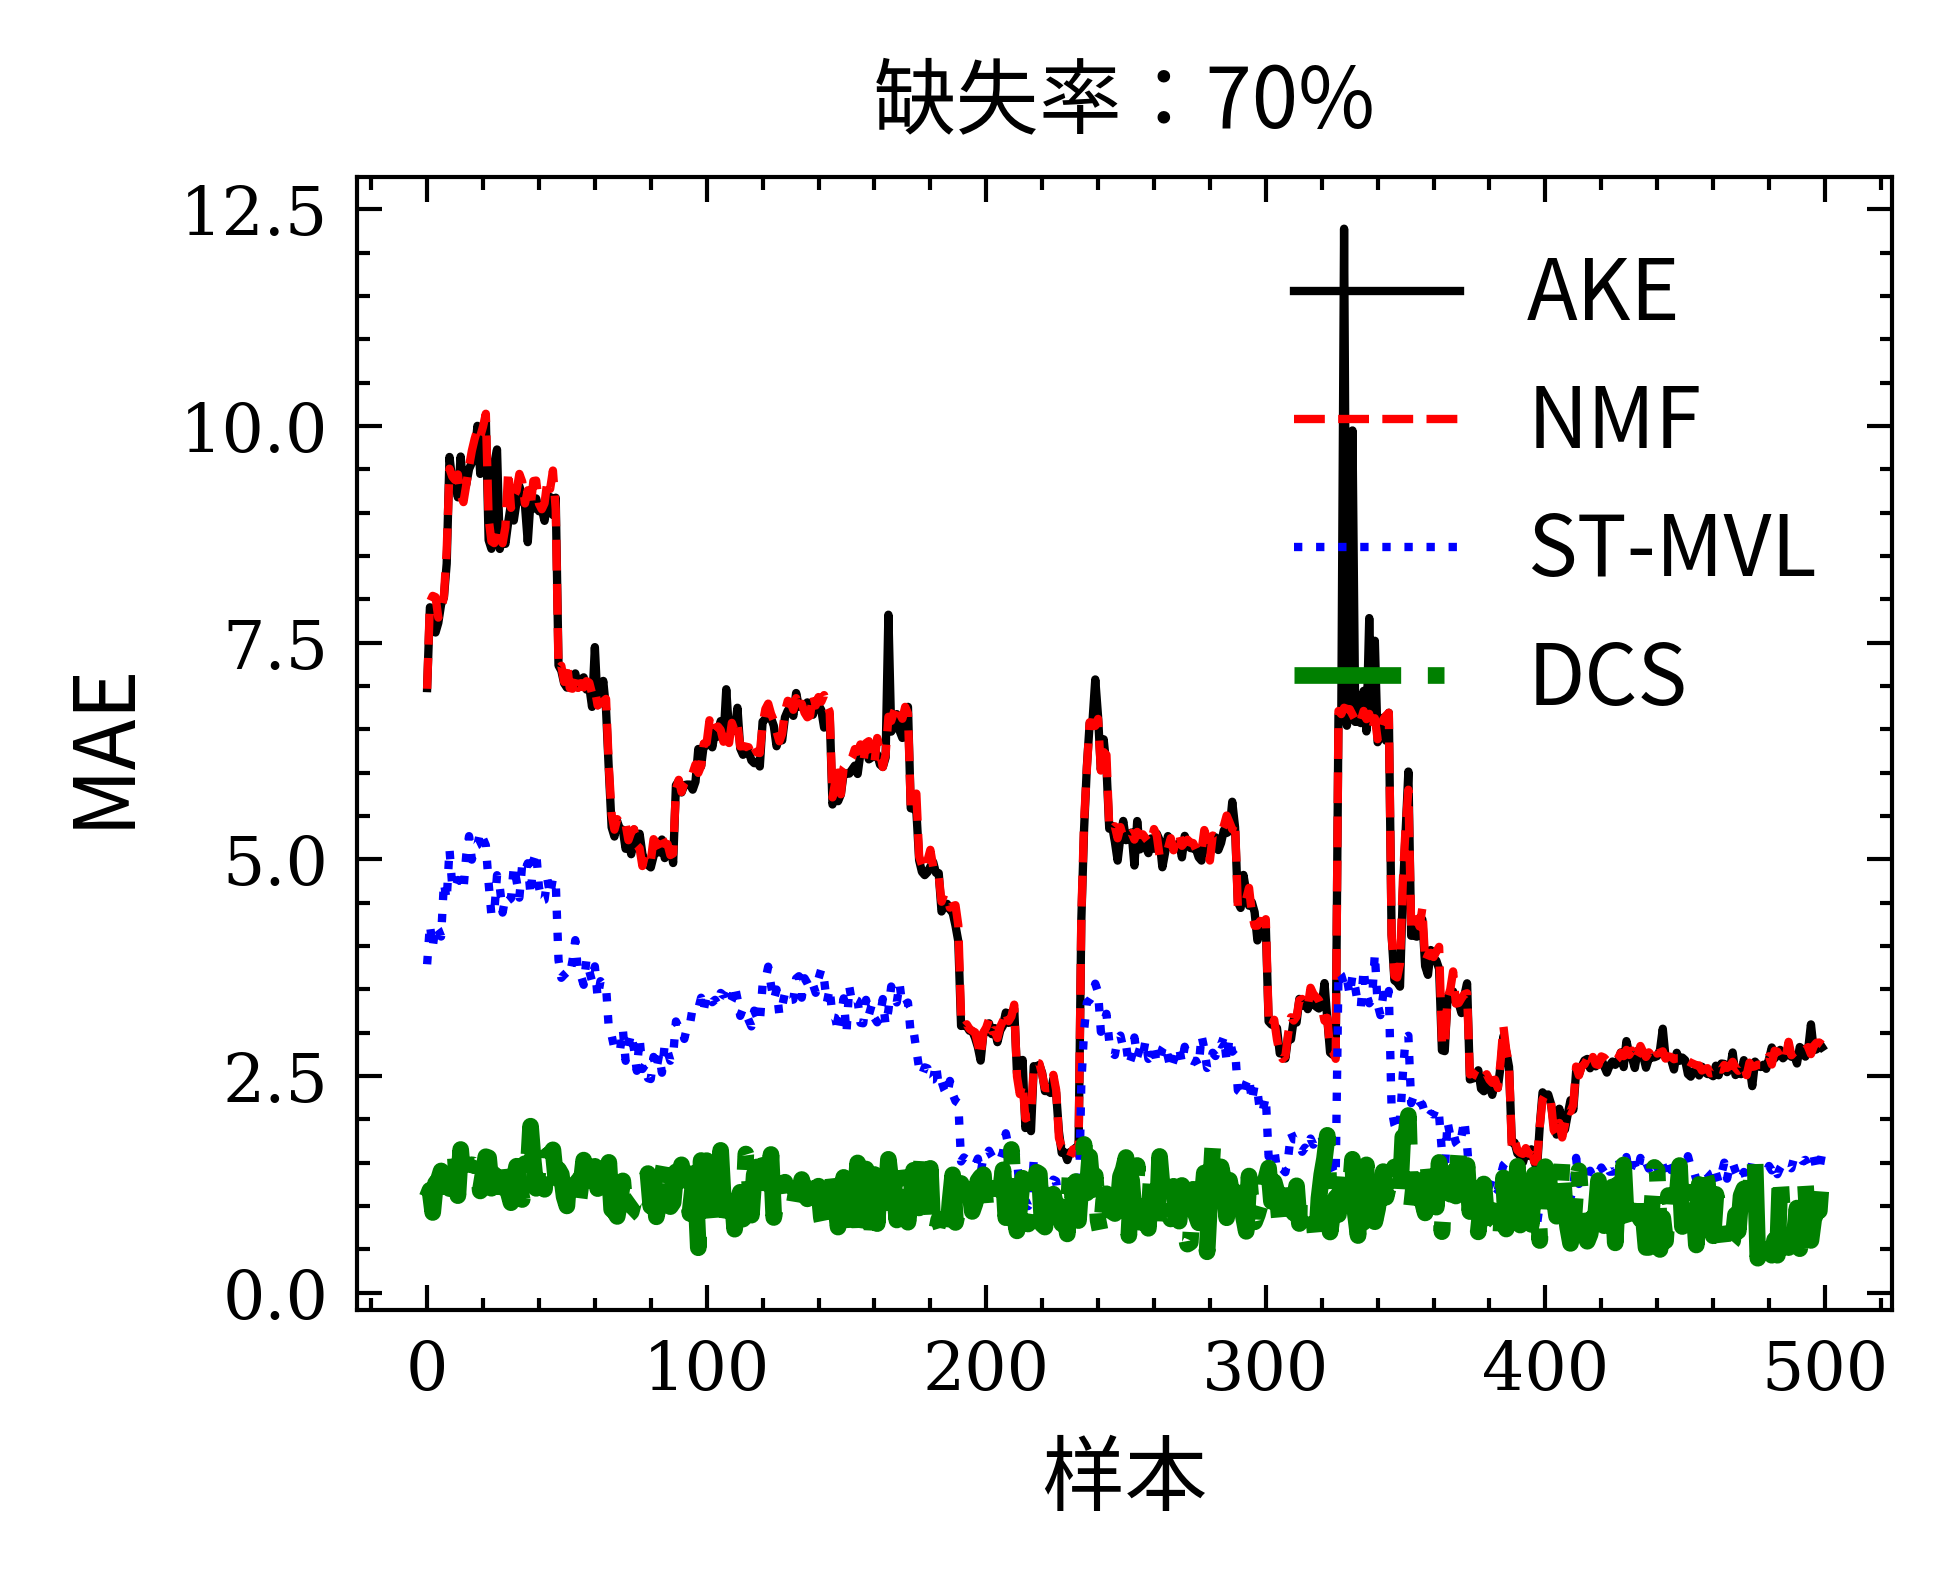

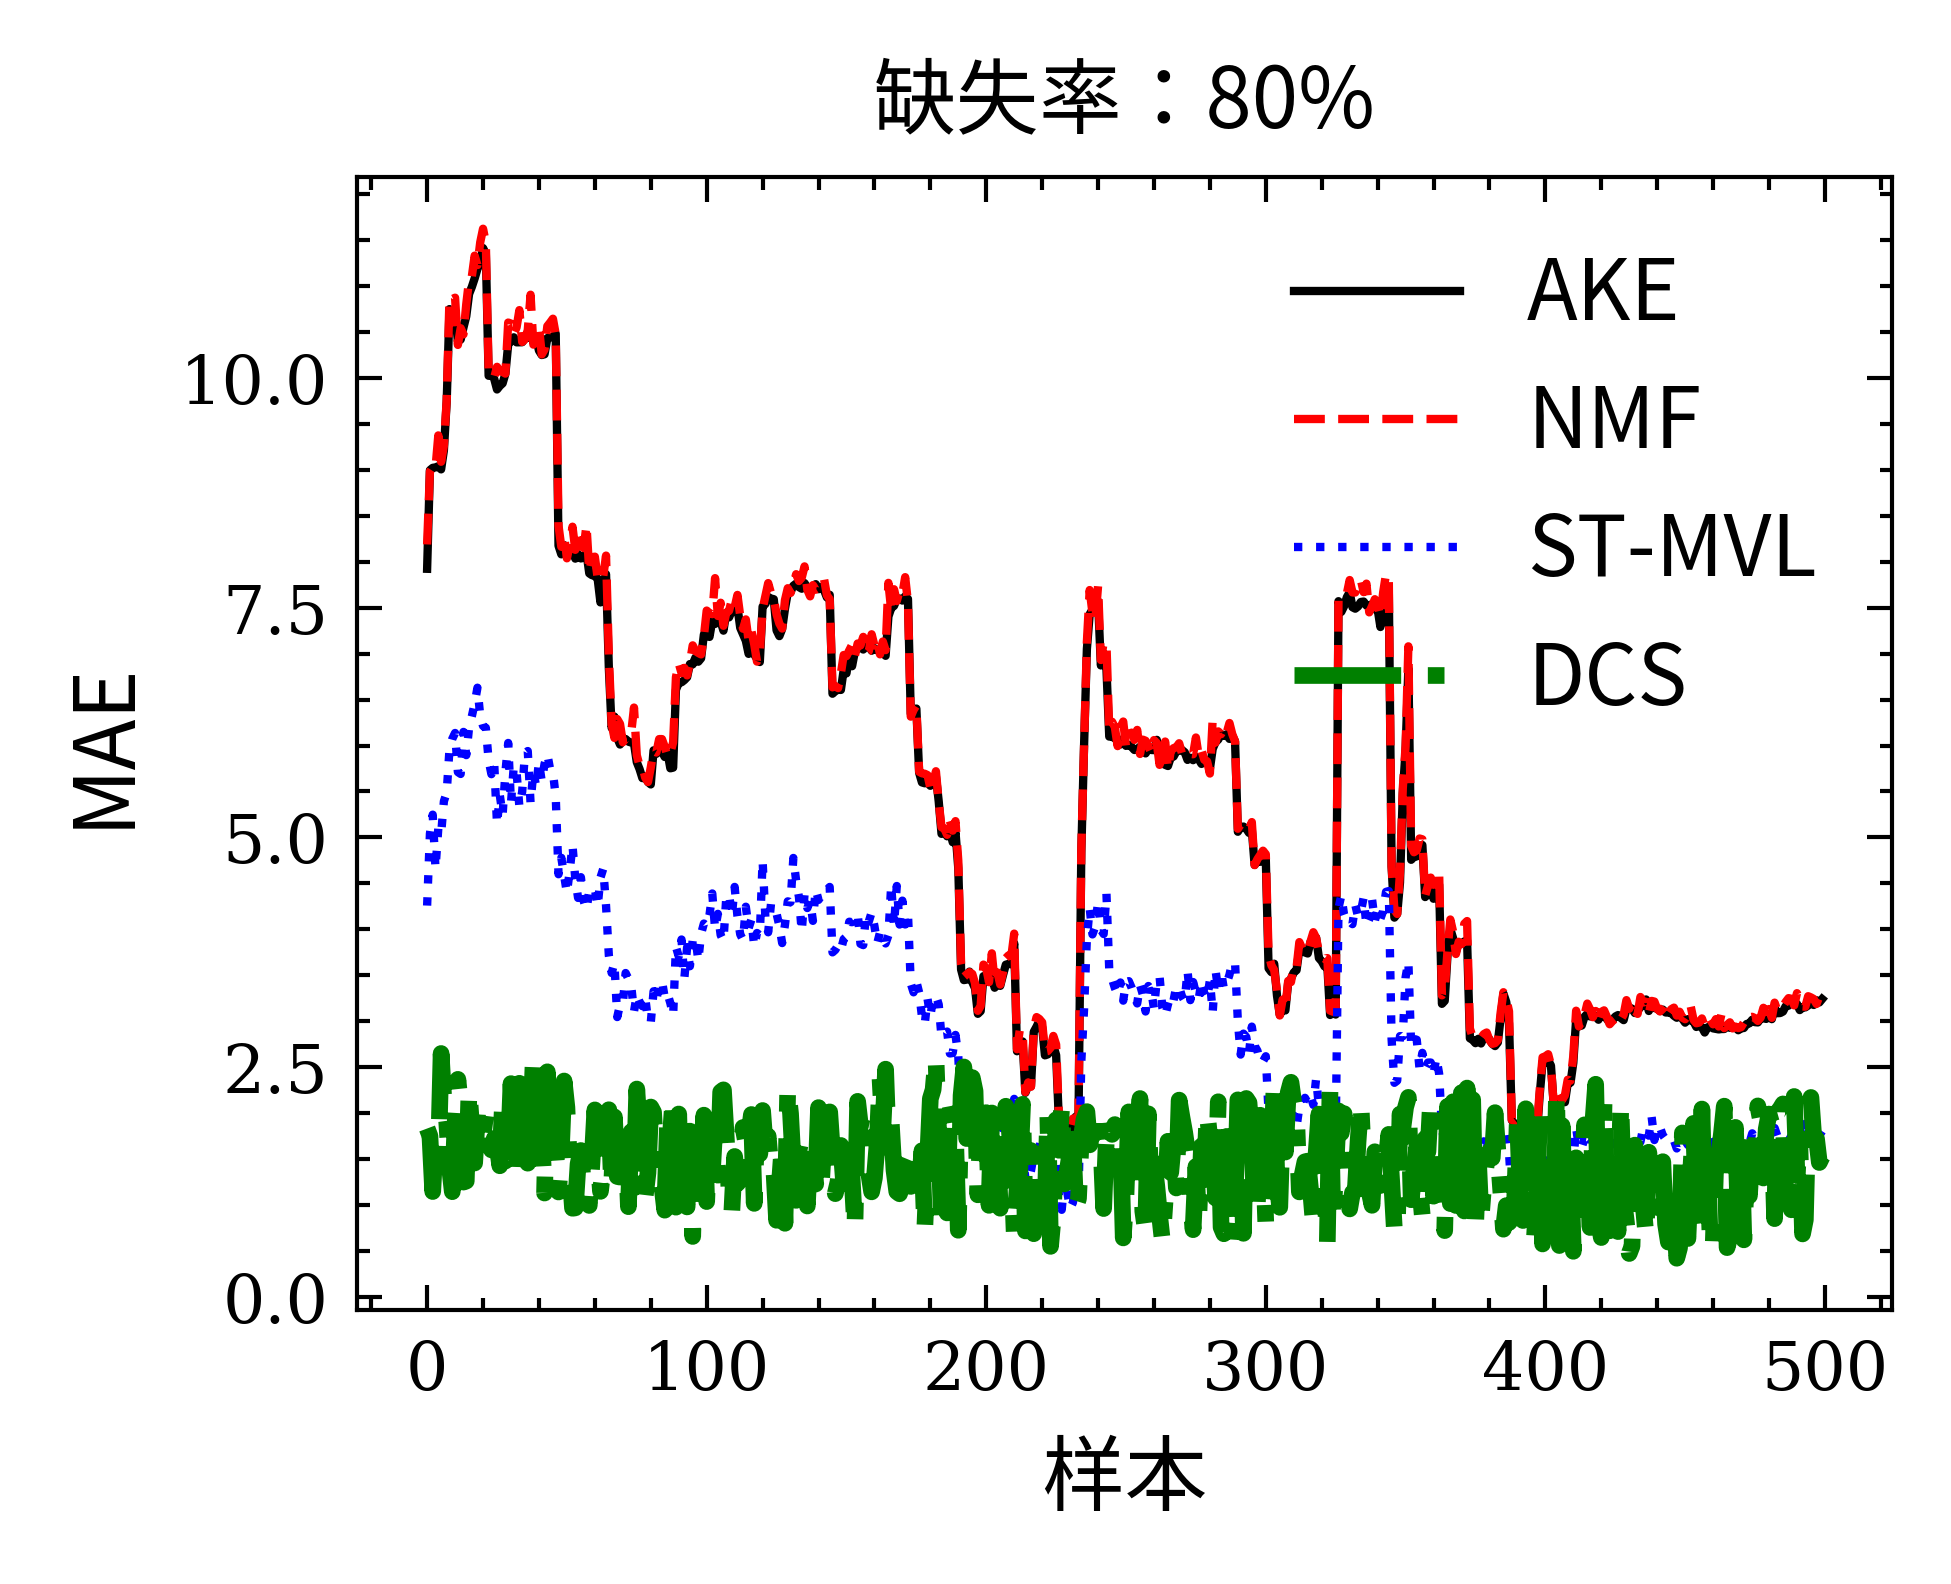

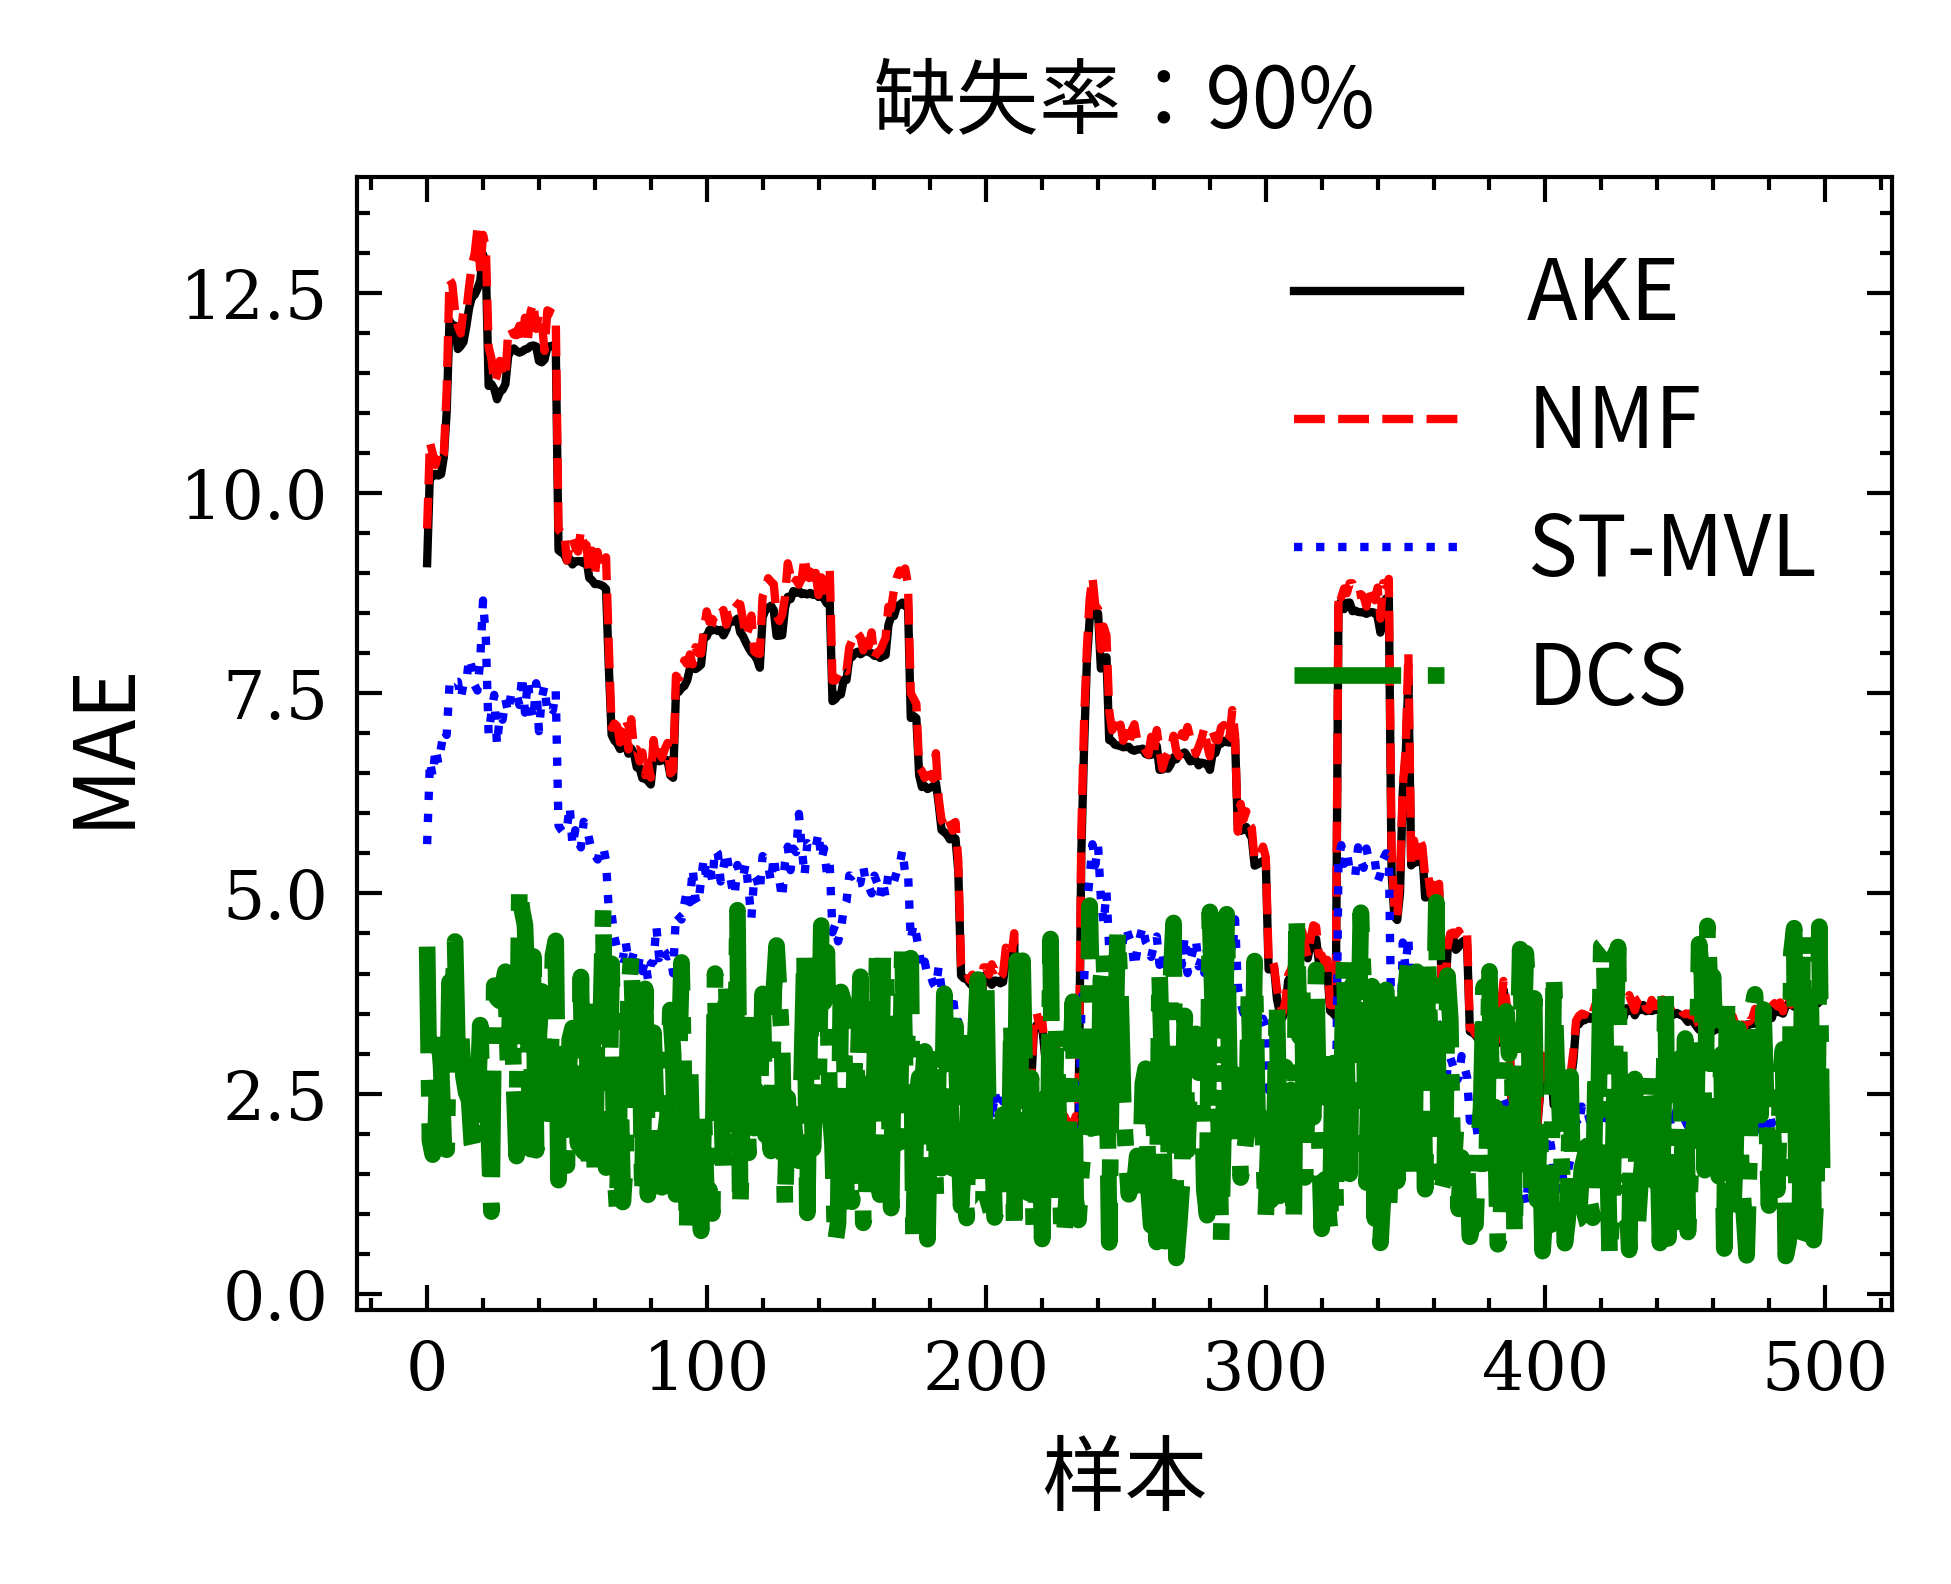

In [21]:
# per missing ratio

# ake_loss_total = []
# kriging_loss_total = []
# nmf_loss_total = []
# st_mvl_loss_total = []
# dcs_loss_total

# plt.rcParams['figure.figsize']=(8,4)


# print(len(ake_loss_total))

with plt.style.context(['science','ieee','no-latex','cjk-sc-font']):

    for i in range(0,9,1):
    #     ake_loss_total[i]
        plt.figure()
        # plt.ylim(-0,10)
        plt.plot(ake_loss_total[i],label='AKE')
        # plt.plot(kriging_loss_total[i],label='kriging_loss')
        plt.plot(nmf_loss_total[i],label='NMF')
        plt.plot(st_mvl_loss_total[i],label='ST-MVL')
        # plt.plot(dcs_loss_total[i],linewidth=1,label='dcs_loss_sa') # 原始模型, 无迭代次数限制
        # plt.plot(dcs_loss_total2[i],linewidth=1,label='dcs_loss')
        plt.plot(dcs_loss_total3[i],linewidth=2,label='DCS') # 带次数限制的版本
        plt.title('缺失率：{}%'.format((i+1)*10),fontproperties = my_font)
        plt.xlabel('样本',fontproperties = my_font)
        plt.ylabel('MAE',fontproperties = my_font)
        plt.legend(prop=my_font)
        plt.savefig('20_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight')# miss_ratio = 0.1
        # plt.savefig('11_dcs_compare_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
# indices = int(miss_ratio*10-1)
# print(indices)

# size = 1000
# plt.rcParams['figure.figsize']=(12,8)
# # x_plot = np.arange(0,29834,1)
# plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
# plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
# plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
# plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
# plt.legend()
# plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

In [96]:
# 0.2 missing ratio

ake_loss = []
kriging_loss = []
nmf_loss = []
st_mvl_loss = []

i = 0

for tensor in tensor_array[:500]:
    data_matrix,mask = generate_missing_matrix(tensor,0.9)
    
    ake = AKE()
    rec = ake.predict(data_matrix)
    ake_loss.append(np.sum(np.abs(rec-tensor)))
    
    odKrigin = OrdryKriging()
    odKrigin.train(data_matrix)
    rec1 = odKrigin.predict()
    kriging_loss.append(np.sum(np.abs(rec1-tensor)))
    
    nmf = NMF()
    rec2 = nmf.predict(data_matrix,mask)
    nmf_loss.append(np.sum(np.abs(rec2-tensor)))
    
    stmvl = ST_MVL()
    ds = get_distance_matrix(data_matrix,True)
    rec3 = stmvl.predict(data_matrix,ds)
    st_mvl_loss.append(np.sum(np.abs(rec3-tensor)))
    
    print(i)
    i += 1

/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:65: RuntimeWarning: invalid value encountered in double_scalars
  res_array[j] = np.dot(coef_array,tmp[true_index]) / (np.sum(coef_array))
/home/esmidth/github/CCS_TA_implement/DCS/baseline/ST_MVL/st_mvl.py:173: RuntimeWarning: invalid value encountered in double_scalars
  res_array[i] = np.dot(spatial_data_for_certain_time,sim_array) / np.sum(sim_array)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [67]:
len(ake_loss)

29834

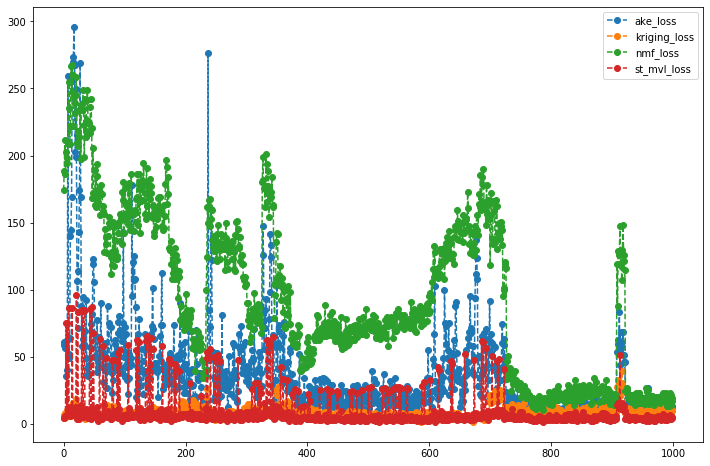

In [79]:
size = 1000
plt.rcParams['figure.figsize']=(12,8)
# x_plot = np.arange(0,29834,1)
plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
plt.legend()
plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

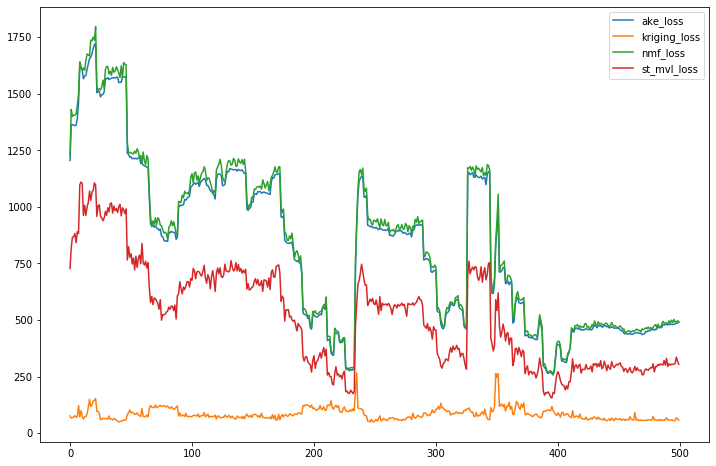

In [97]:
size = 500
plt.rcParams['figure.figsize']=(12,8)
# x_plot = np.arange(0,29834,1)
plt.plot(ake_loss[:size],label='ake_loss')
plt.plot(kriging_loss[:size],label='kriging_loss')
plt.plot(nmf_loss[:size],label='nmf_loss')
plt.plot(st_mvl_loss[:size],label='st_mvl_loss')
plt.legend()
plt.savefig('1_loss_bench_{}_90_11.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

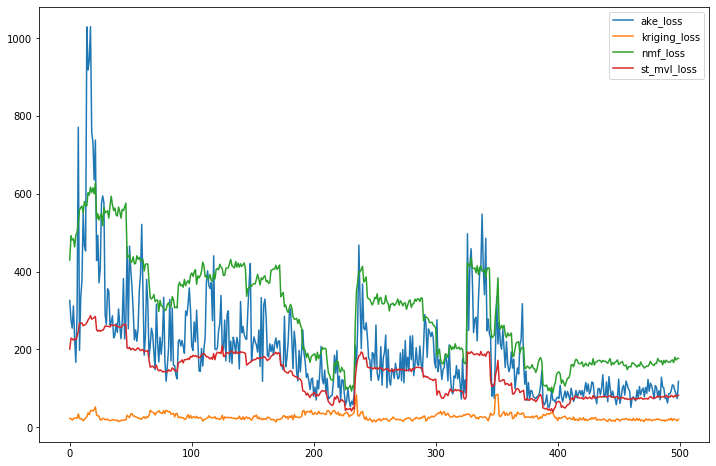

In [82]:
size = 500
plt.rcParams['figure.figsize']=(12,8)
# x_plot = np.arange(0,29834,1)
plt.plot(ake_loss_30[:size],label='ake_loss')
plt.plot(kriging_loss_30[:size],label='kriging_loss')
plt.plot(nmf_loss_30[:size],label='nmf_loss')
plt.plot(st_mvl_loss_30[:size],label='st_mvl_loss')
plt.legend()
plt.savefig('1_loss_bench_{}_30_11.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

In [23]:
ake = AKE()
rec = ake.predict(data_matrix)
print(np.sum(np.abs(rec-tensor_array[0])))

277.1402164671953


/home/esmidth/github/CCS_TA_implement/DCS/baseline/AKE/ake.py:103: RuntimeWarning: invalid value encountered in true_divide
  sim_array = sim_array / np.sum(sim_array)


In [24]:
odKrigin = OrdryKriging()
odKrigin.train(data_matrix)
rec1 = odKrigin.predict()
print(np.sum(np.abs(rec1-tensor_array[0])))

20.730836590548172


In [25]:
nmf = NMF()
rec2 = nmf.predict(data_matrix,mask)
print(np.sum(np.abs(rec2-tensor_array[0])))

427.42631196277574


In [27]:
stmvl = ST_MVL()
ds = get_distance_matrix(data_matrix,True)
rec3 = stmvl.predict(data_matrix,ds)
print(np.sum(np.abs(rec3-tensor_array[0])))

200.4058400880628
